## Бинарная классификация

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('./data/whole_data_practice3.csv')

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [25]:
df.head(30)

,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,e_rpmag,ipmag,e_ipmag,fuv_mag,nuv_mag,err,present,type,min_mag,max_mag
0,129.872235,18.219273,6,10.388,0.033,11.080,0.024,13.351,3.579,12.599,3.330,10.066,0.031,22.017,15.786,4.888841,0,NaN,NaN,NaN
1,143.755605,4.997145,5,14.104,0.053,14.767,0.040,14.272,0.209,15.754,4.109,13.373,0.773,23.920,19.509,4.186825,0,NaN,NaN,NaN
2,141.550218,2.826565,5,12.346,0.046,12.909,0.045,12.494,0.197,14.430,3.722,11.920,0.520,23.090,16.583,3.763859,0,NaN,NaN,NaN
3,143.899031,4.676475,4,13.661,0.041,14.127,0.041,13.766,0.181,15.375,3.672,13.049,0.672,24.091,17.881,3.737819,0,NaN,NaN,NaN
4,141.728736,2.834912,4,13.468,0.077,14.042,0.048,13.634,0.208,15.422,3.632,13.227,0.000,22.714,17.651,3.639082,1,RS,13.29,13.41
5,168.580444,1.051704,4,11.143,0.027,11.592,0.025,13.105,3.575,10.993,0.165,11.012,0.052,18.347,14.734,3.579373,0,NaN,13.29,13.41
6,341.874650,-37.464627,5,9.482,0.000,10.149,0.031,10.986,1.915,11.035,2.490,9.073,0.000,22.512,15.160,3.141383,0,NaN,13.29,13.41
7,141.300348,3.499374,4,11.564,0.056,12.160,0.084,11.716,0.123,13.713,2.663,11.033,0.400,23.511,16.393,2.697571,0,NaN,13.29,13.41
8,129.795551,18.175921,6,10.179,0.038,10.731,0.013,11.355,1.902,10.829,1.883,10.018,0.010,20.863,14.930,2.676753,0,NaN,13.29,13.41
9,118.424259,21.332130,4,11.203,0.023,11.553,0.033,11.374,0.050,11.141,0.040,12.418,2.615,18.715,14.744,2.616093,0,NaN,13.29,13.41


In [26]:
df.describe()

,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,e_rpmag,ipmag,e_ipmag,fuv_mag,nuv_mag,err,present,min_mag,max_mag
count,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64984.000000,64984.000000
mean,189.900410,5.743908,11.435050,13.051703,0.050753,13.662124,0.057441,13.326147,0.061010,12.894450,0.052636,12.748919,0.089134,22.010904,17.405586,0.172671,0.101311,13.060289,9.788631
std,117.334916,20.524489,34.727653,1.884791,0.053581,1.949798,0.064043,1.902269,0.101006,1.865886,0.068216,1.838006,0.134957,1.792885,1.994318,0.174754,0.301742,1.630775,5.841919
min,0.007155,-53.300726,3.000000,6.122000,0.000000,6.673000,0.000000,6.563000,0.000000,5.741000,0.000000,4.557000,0.000000,11.961000,11.226000,0.000000,0.000000,5.010000,0.001000
25%,117.916037,-3.589013,4.000000,11.656000,0.023000,12.225000,0.025000,11.903000,0.022000,11.517000,0.024000,11.413000,0.031000,21.269000,16.086000,0.087936,0.000000,12.040000,0.740000
50%,168.777423,1.502730,5.000000,12.887000,0.039000,13.434000,0.041000,13.121000,0.036000,12.755000,0.040000,12.646000,0.058000,22.554000,17.098000,0.127098,0.000000,13.220000,12.640000
75%,322.452068,13.339830,7.000000,14.579000,0.063000,15.142250,0.068000,14.826000,0.060000,14.412000,0.064000,14.247000,0.097000,23.283000,18.435000,0.189806,0.000000,14.200000,13.870000
max,359.995160,69.080703,387.000000,17.464000,2.511000,18.640000,1.864000,17.949000,3.579000,17.209000,4.109000,17.762000,2.615000,24.849000,24.624000,4.888841,1.000000,19.600000,20.470000


In [27]:
df.shape

(64988, 20)

In [28]:
df.info()
# Все столбцы, кроме type, у нас числовые
# 4 объекта имеют NaN в min_mag и max_mag

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64988 entries, 0 to 64987
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAJ2000  64988 non-null  float64
 1   DEJ2000  64988 non-null  float64
 2   nobs     64988 non-null  int64  
 3   Vmag     64988 non-null  float64
 4   e_Vmag   64988 non-null  float64
 5   Bmag     64988 non-null  float64
 6   e_Bmag   64988 non-null  float64
 7   gpmag    64988 non-null  float64
 8   e_gpmag  64988 non-null  float64
 9   rpmag    64988 non-null  float64
 10  e_rpmag  64988 non-null  float64
 11  ipmag    64988 non-null  float64
 12  e_ipmag  64988 non-null  float64
 13  fuv_mag  64988 non-null  float64
 14  nuv_mag  64988 non-null  float64
 15  err      64988 non-null  float64
 16  present  64988 non-null  int64  
 17  type     6517 non-null   object 
 18  min_mag  64984 non-null  float64
 19  max_mag  64984 non-null  float64
dtypes: float64(17), int64(2), object(1)
memory usage: 

In [29]:
df[df.min_mag.isna()]
# type у нас здесь NaN, поэтому их проще удалить

,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,e_rpmag,ipmag,e_ipmag,fuv_mag,nuv_mag,err,present,type,min_mag,max_mag
0,129.872235,18.219273,6,10.388,0.033,11.080,0.024,13.351,3.579,12.599,3.330,10.066,0.031,22.017,15.786,4.888841,0,NaN,NaN,NaN
1,143.755605,4.997145,5,14.104,0.053,14.767,0.040,14.272,0.209,15.754,4.109,13.373,0.773,23.920,19.509,4.186825,0,NaN,NaN,NaN
2,141.550218,2.826565,5,12.346,0.046,12.909,0.045,12.494,0.197,14.430,3.722,11.920,0.520,23.090,16.583,3.763859,0,NaN,NaN,NaN
3,143.899031,4.676475,4,13.661,0.041,14.127,0.041,13.766,0.181,15.375,3.672,13.049,0.672,24.091,17.881,3.737819,0,NaN,NaN,NaN


In [30]:
df.dropna(axis=0, subset=['min_mag', 'max_mag'], inplace=True)
df.head()
# 4 первых элемента, которые должны были удалиться, удалились

,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,e_rpmag,ipmag,e_ipmag,fuv_mag,nuv_mag,err,present,type,min_mag,max_mag
4,141.728736,2.834912,4,13.468,0.077,14.042,0.048,13.634,0.208,15.422,3.632,13.227,0.000,22.714,17.651,3.639082,1,RS,13.29,13.41
5,168.580444,1.051704,4,11.143,0.027,11.592,0.025,13.105,3.575,10.993,0.165,11.012,0.052,18.347,14.734,3.579373,0,NaN,13.29,13.41
6,341.874650,-37.464627,5,9.482,0.000,10.149,0.031,10.986,1.915,11.035,2.490,9.073,0.000,22.512,15.160,3.141383,0,NaN,13.29,13.41
7,141.300348,3.499374,4,11.564,0.056,12.160,0.084,11.716,0.123,13.713,2.663,11.033,0.400,23.511,16.393,2.697571,0,NaN,13.29,13.41
8,129.795551,18.175921,6,10.179,0.038,10.731,0.013,11.355,1.902,10.829,1.883,10.018,0.010,20.863,14.930,2.676753,0,NaN,13.29,13.41


In [160]:
df.drop('type', axis=1, inplace=True)
# Для многоклассовой классификации

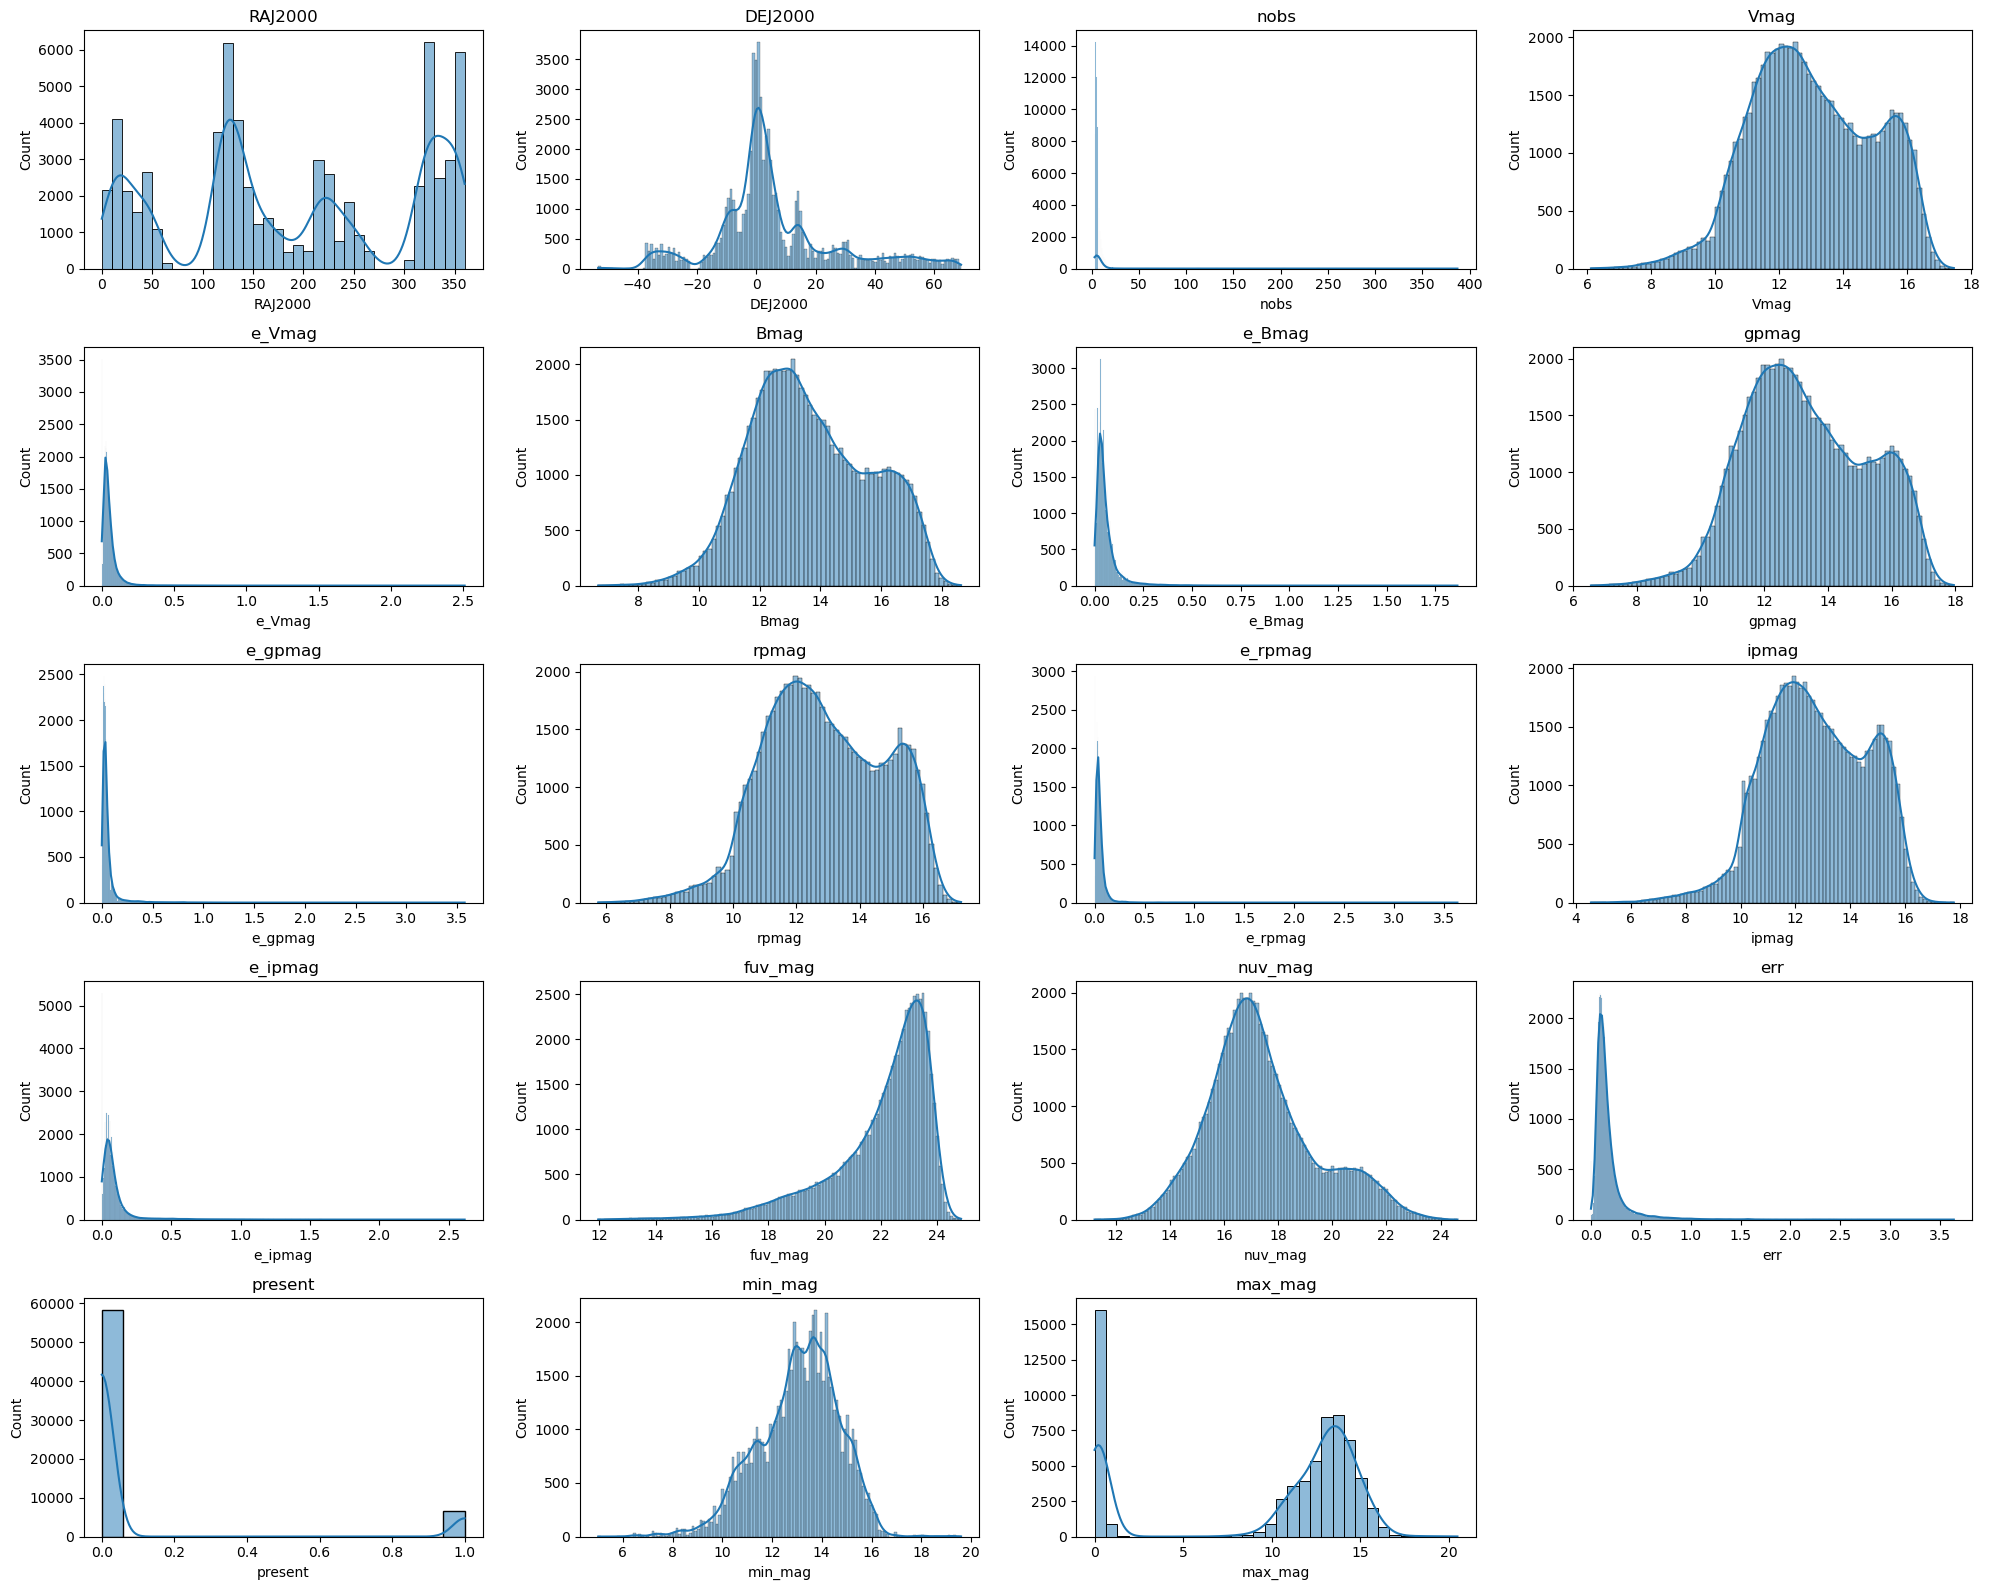

In [32]:
# Гистограммы

fig, axes = plt.subplots(5, 4, figsize=(20, 16))
axes = axes.flatten()

for index, column in enumerate(df.columns):
    sns.histplot(x=df[column], ax=axes[index], kde=True)
    axes[index].set_title(column)
    
fig.delaxes(axes[19])  # последний график пустой 
    
plt.tight_layout()
plt.show()

# Распределения совершенно разные

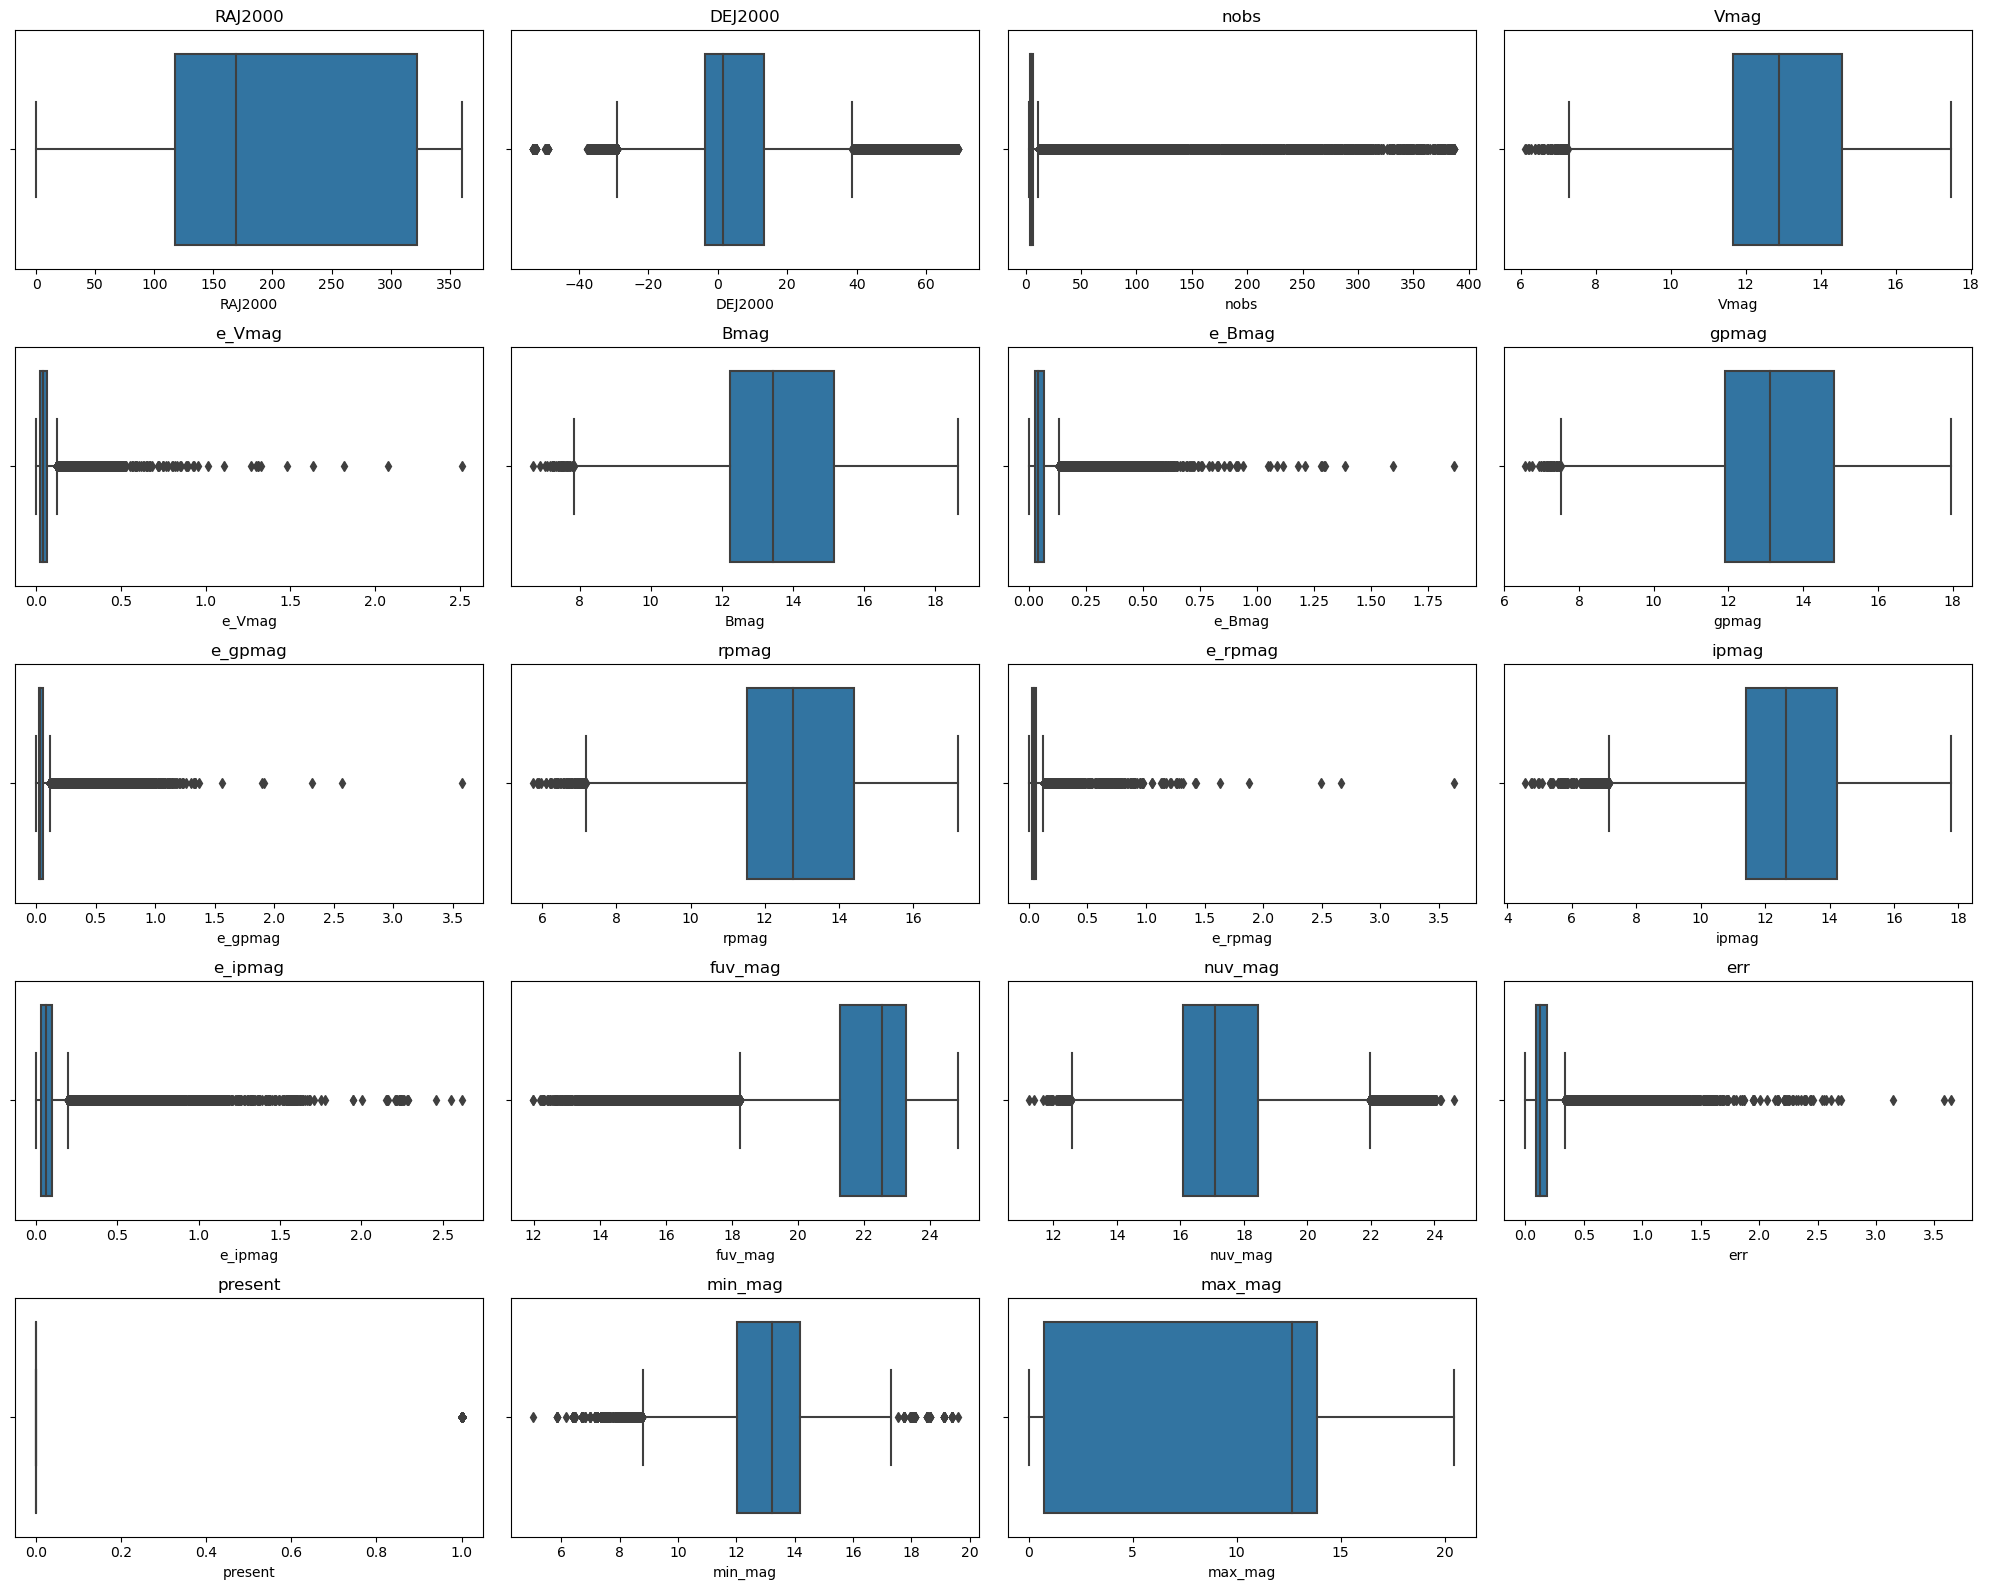

In [33]:
# Ящики с усами

fig, axes = plt.subplots(5, 4, figsize=(20, 16))
axes = axes.flatten()

for index, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[index])
    axes[index].set_title(column)
    
fig.delaxes(axes[19])  # последний график пустой 
    
plt.tight_layout()
plt.show()

# Выбросы есть, но лучше их оставить, так как они могут быть важными и,
# скорее всего, не являются ошибками в данных

In [161]:
# Разделим набор данных на матрицу признаков и целевые значения'
# present - целевой столбец для бинарной классификации'

X = df.drop('present', axis=1)
y = df['present']

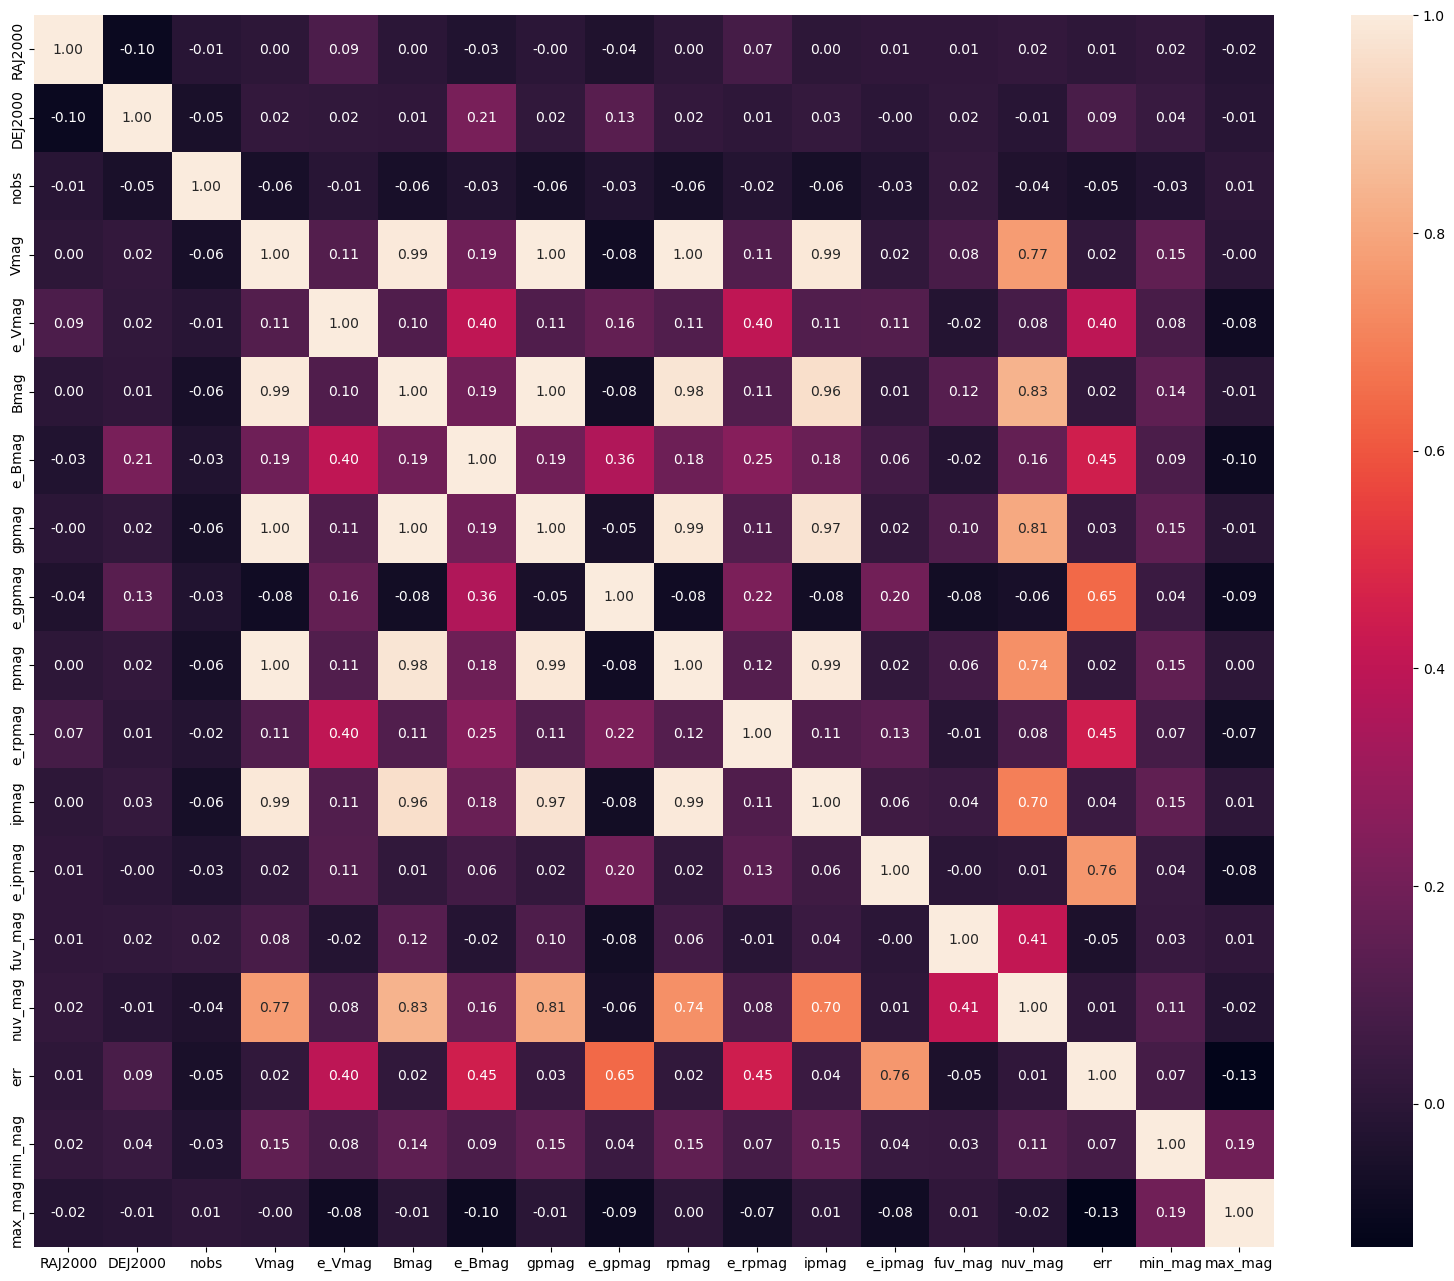

In [35]:
# Посмотрим коррелируемость признаков
plt.figure(figsize=(20, 16))

sns.heatmap(X.corr(), annot=True, fmt='.2f')
plt.show()

# У нас есть сильно коррелируемые признаки
# Применим метод главных компонент, чтобы уменьшить число признаков

In [156]:
# Но попробуем перед этим удалить сильно коррелирующие признаки

delete_columns = [
    'Bmag',
    'gpmag',
    'rpmag',
    'e_gpmag',
    'ipmag'
]

X_deleted = X.drop(columns=delete_columns)

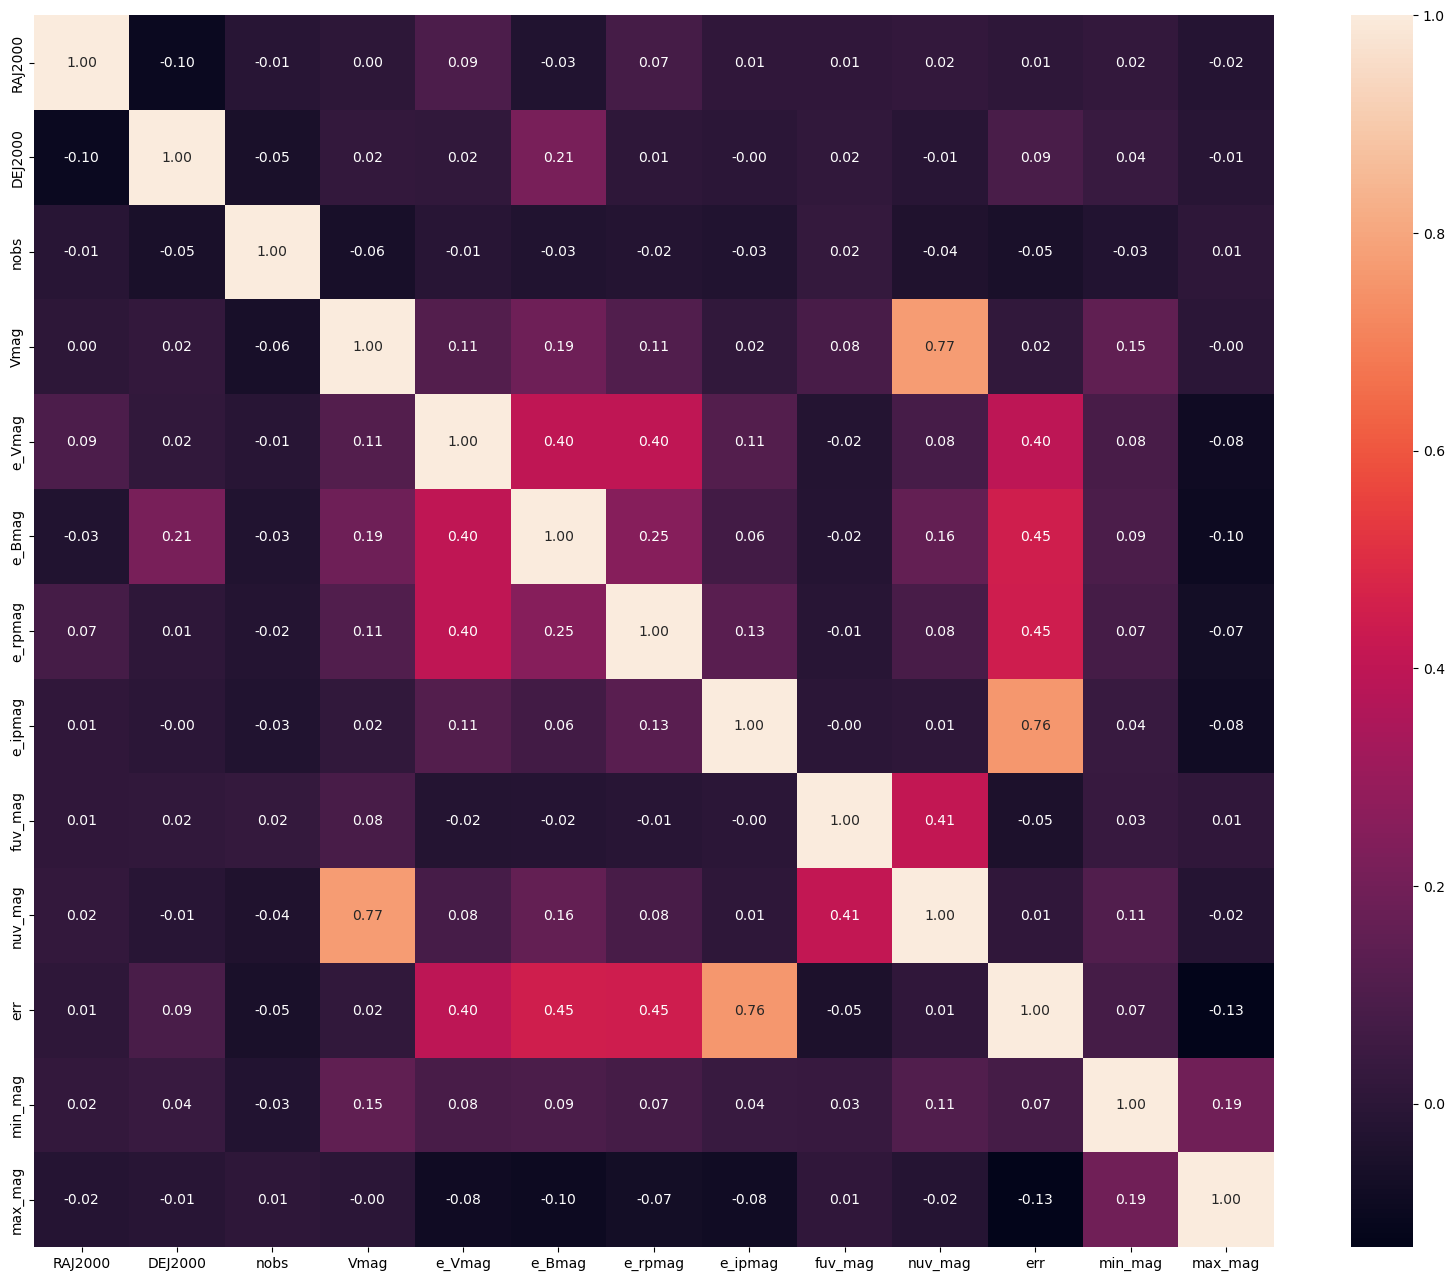

In [117]:
plt.figure(figsize=(20, 16))

sns.heatmap(X.corr(), annot=True, fmt='.2f')
plt.show()

In [157]:
# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_deleted)

X_scaled[:3]

ValueError: could not convert string to float: 'RS'

In [119]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
X_pca[0]

array([ 32.42183303, -10.38560868,  -0.97375384,   7.672828  ,
       -12.81810791,   3.28517869,  -0.85156171, -19.87172564,
        -5.74550636,  39.68680941])

### Преобразования методом главных компонент или нормировка обязательны для логистической регрессии, метода k ближайших соседей и метода опорных векторов

### В других моделях нормировка и PCA наоборот ухудшает предсказания

In [120]:
# Проверим сбалансированность выборки

len(y[y == 0]) / len(y)

# Объект не звезда в 90% случаев, звезда в 10% случаев'
# Выборка не сбалансирована'

0.8986827526775821

In [121]:
# Функция для вычисления метрик, вывода, построения матрицы ошибок

def count_metrics(y, y_pred, method):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

    # Матрица ошибок
    plt.figure(figsize=(20, 16))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Целевые значения')
    plt.title(f'Матрица ошибок: {method}')
    plt.show()

In [122]:
# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Accuracy: 0.6568
Precision: 0.1549
Recall: 0.5358
F1-score: 0.2404


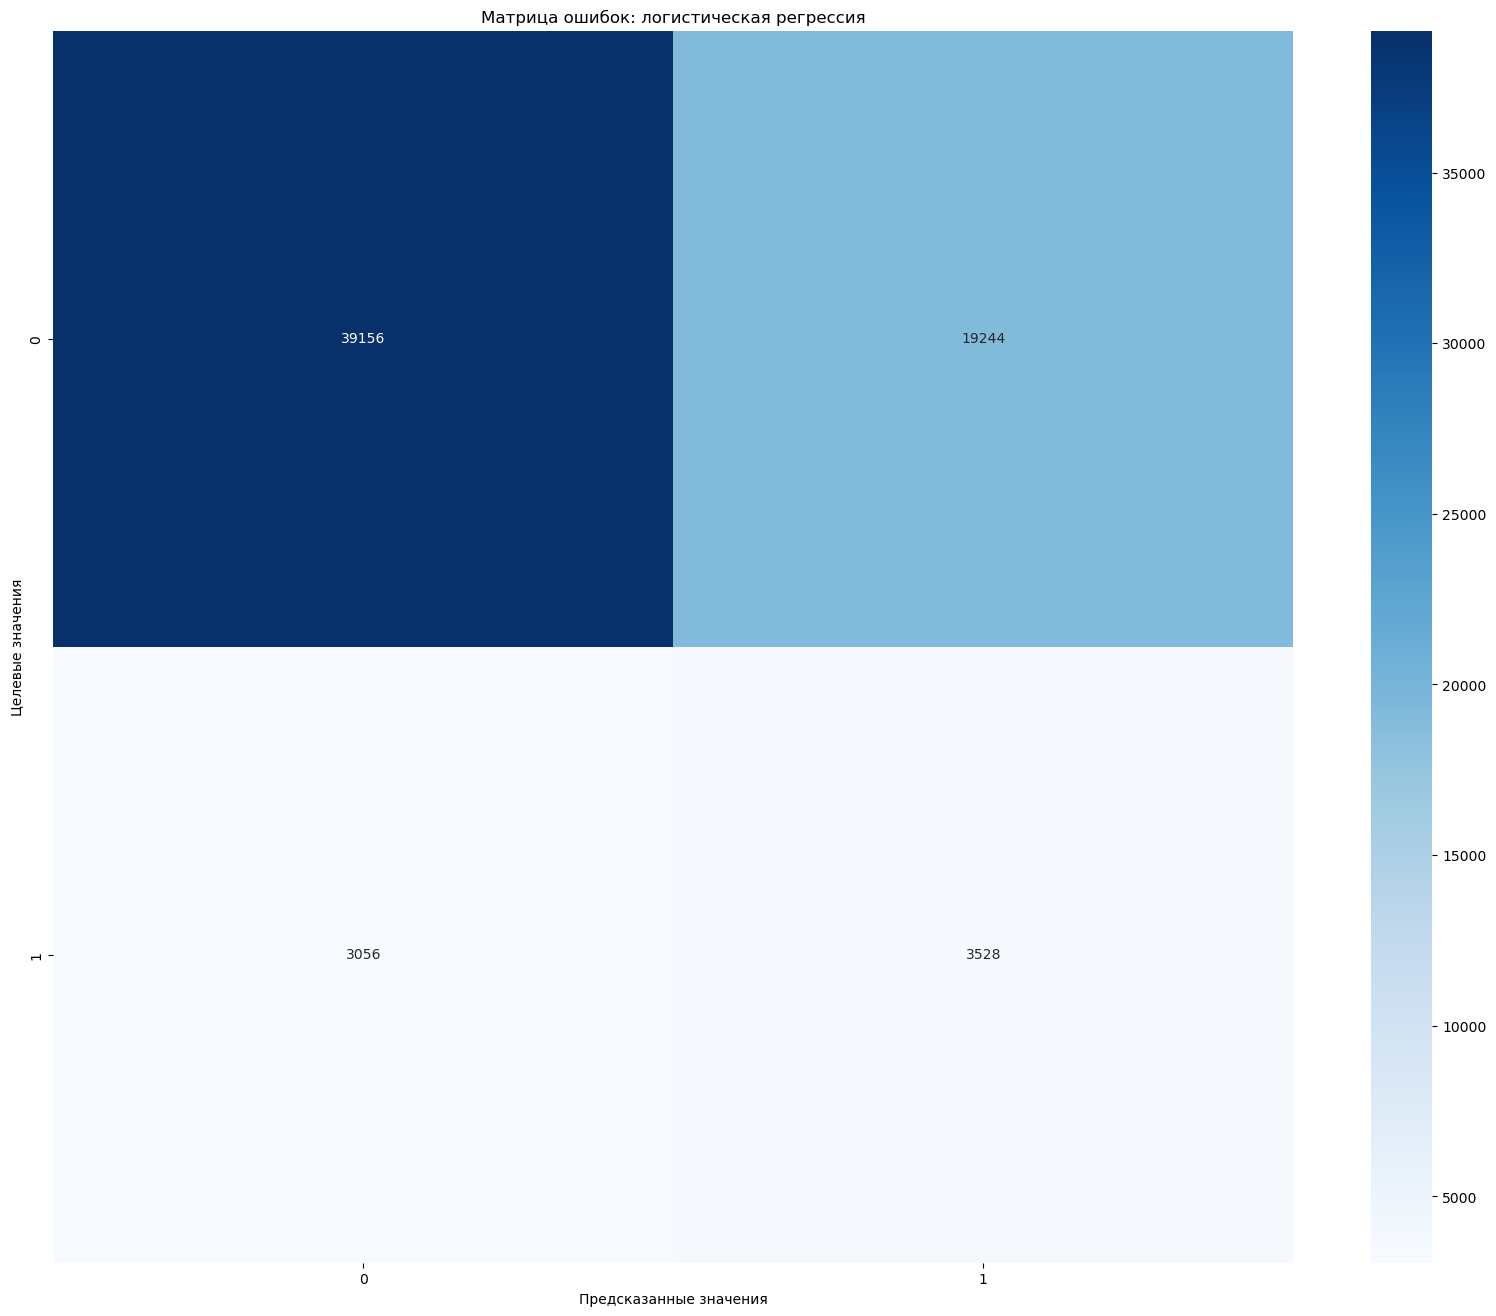

In [129]:
# Логистическая регрессия

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, class_weight='balanced')
y_pred = cross_val_predict(lr, X_scaled, y, cv=cv)

count_metrics(y, y_pred, 'логистическая регрессия')  # точность низкая

Accuracy: 0.9162
Precision: 0.6465
Recall: 0.3817
F1-score: 0.4800


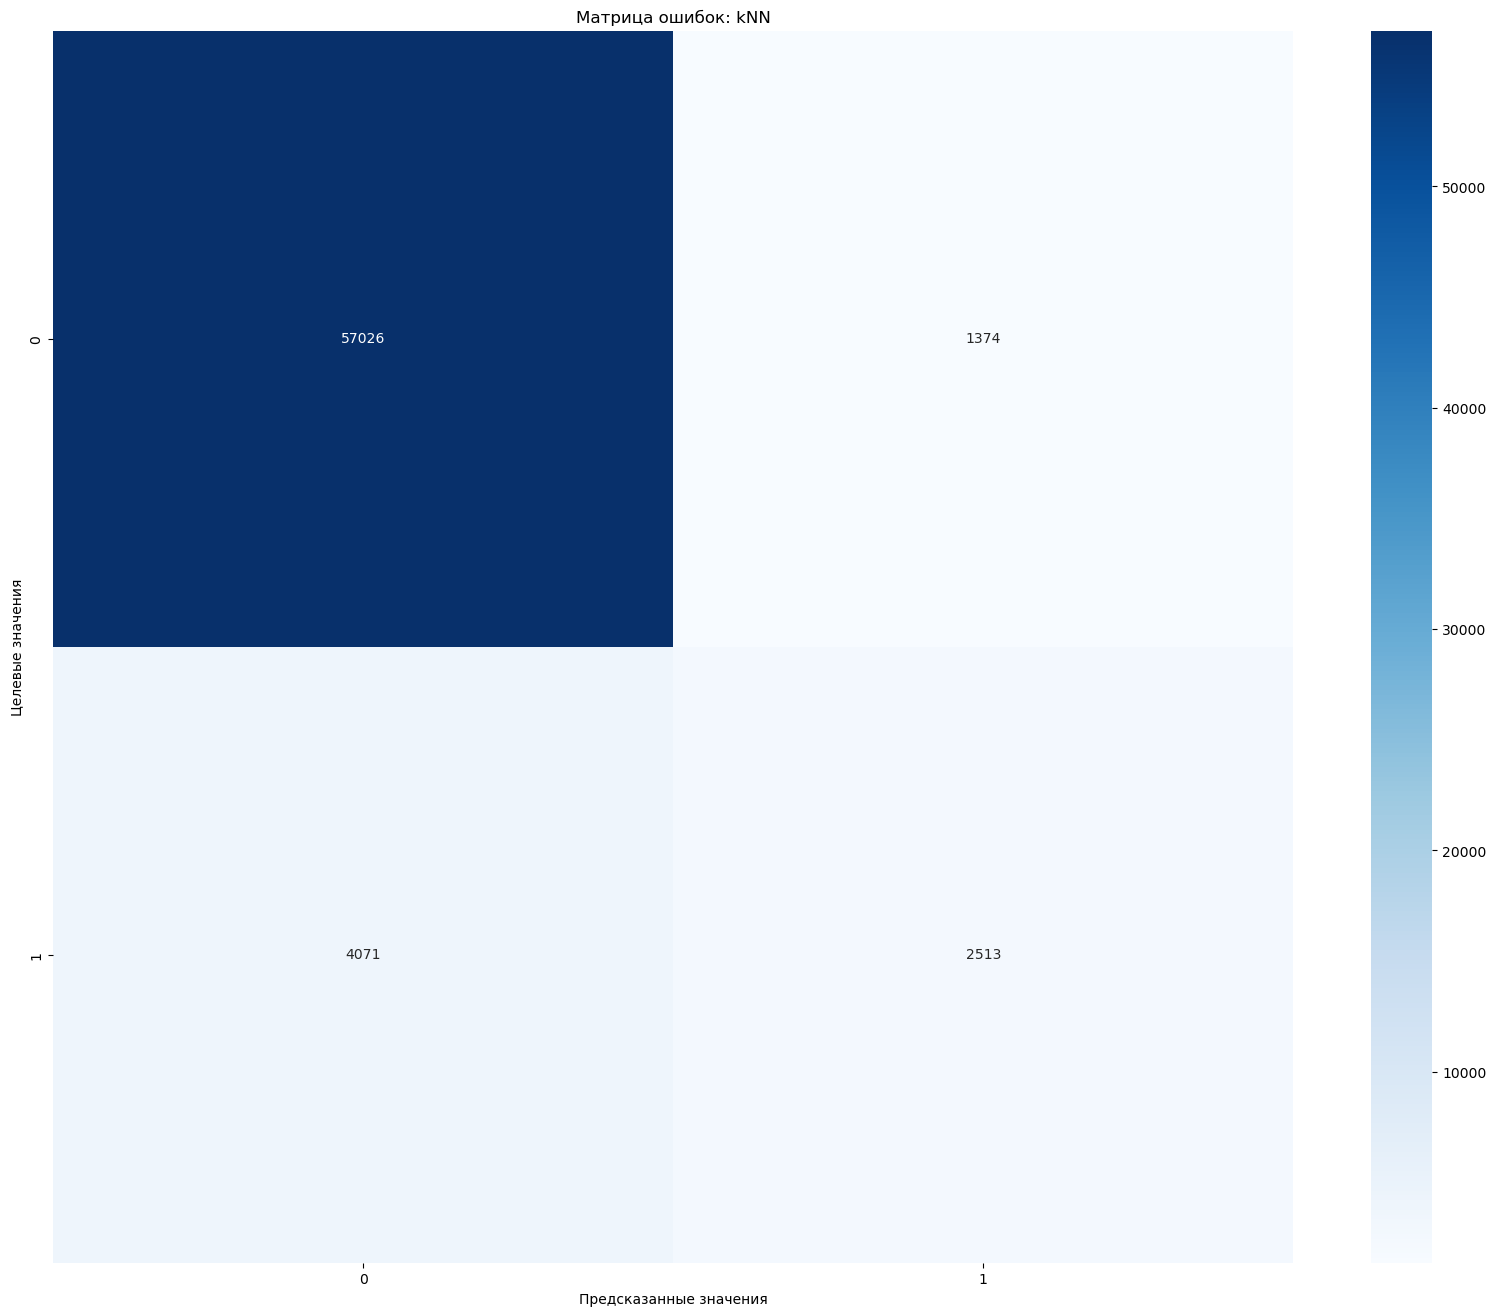

In [133]:
# Метод k ближайших соседей

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
y_pred = cross_val_predict(knn, X_scaled, y, cv=cv)

count_metrics(y, y_pred, 'kNN')  # полноту можно улучшить

Accuracy: 0.4791
Precision: 0.1017
Recall: 0.5286
F1-score: 0.1705


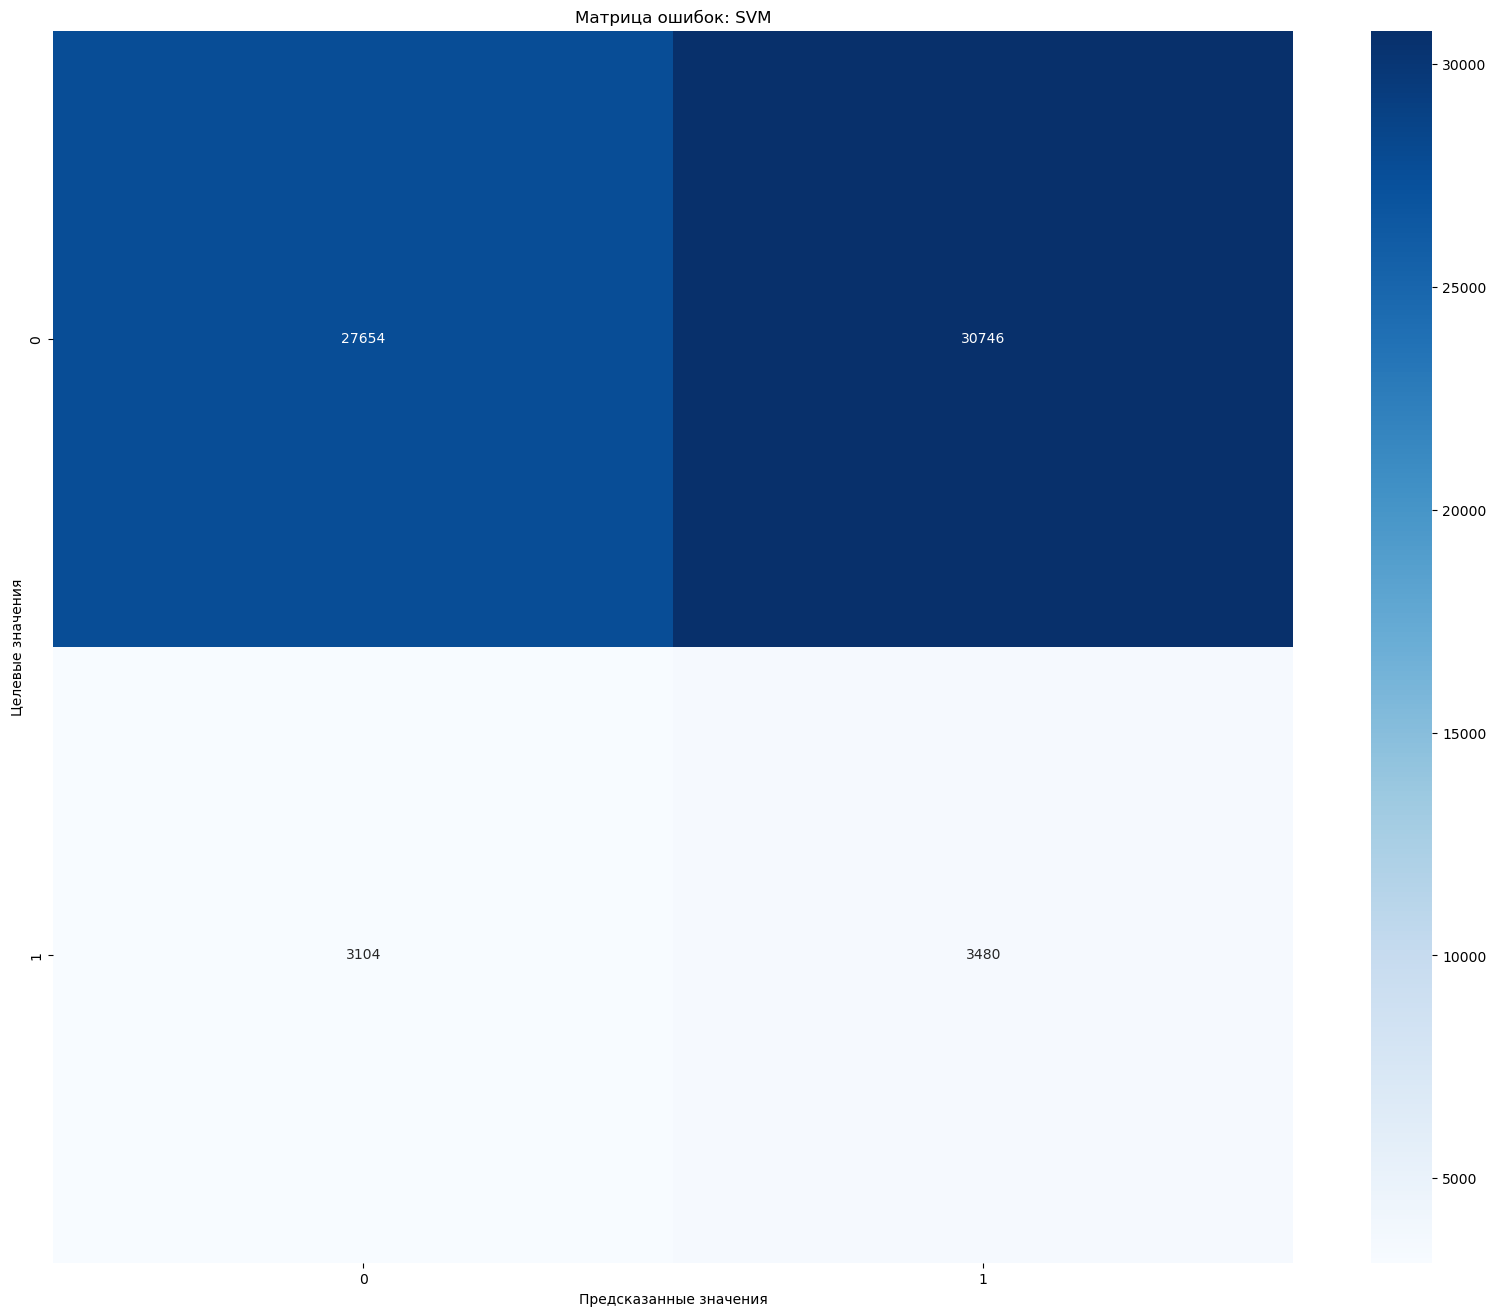

In [136]:
# Метод опорных векторов

from sklearn.svm import SVC

svc = SVC(class_weight='balanced', kernel='linear', max_iter=2000)
y_pred = cross_val_predict(svc, X_scaled, y, cv=cv)

count_metrics(y, y_pred, 'SVM')  # точность низкая

Accuracy: 0.9107
Precision: 0.5604
Recall: 0.5495
F1-score: 0.5549


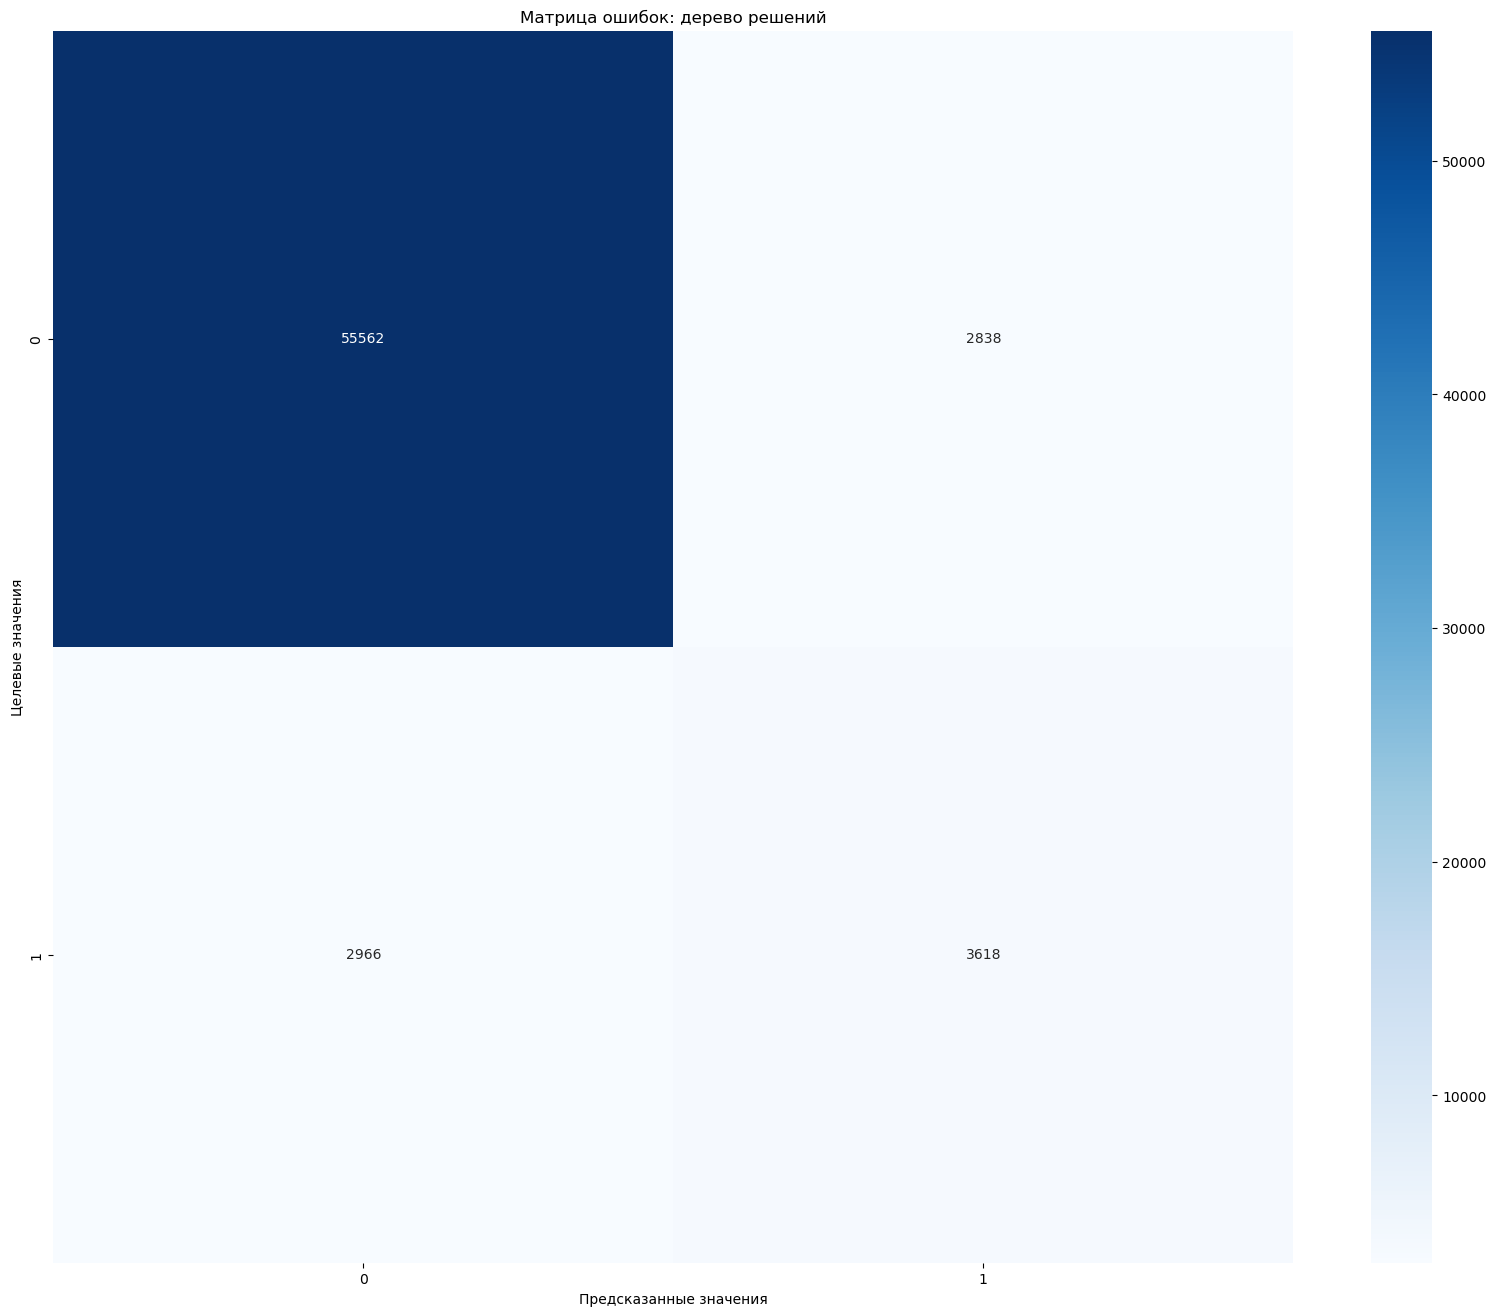

In [79]:
# Дерево решений

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", class_weight='balanced')
y_pred = cross_val_predict(tree, X, y, cv=cv)

count_metrics(y, y_pred, 'дерево решений')  # F1-меру можно улучшить

Accuracy: 0.9365
Precision: 0.8766
Recall: 0.4347
F1-score: 0.5812


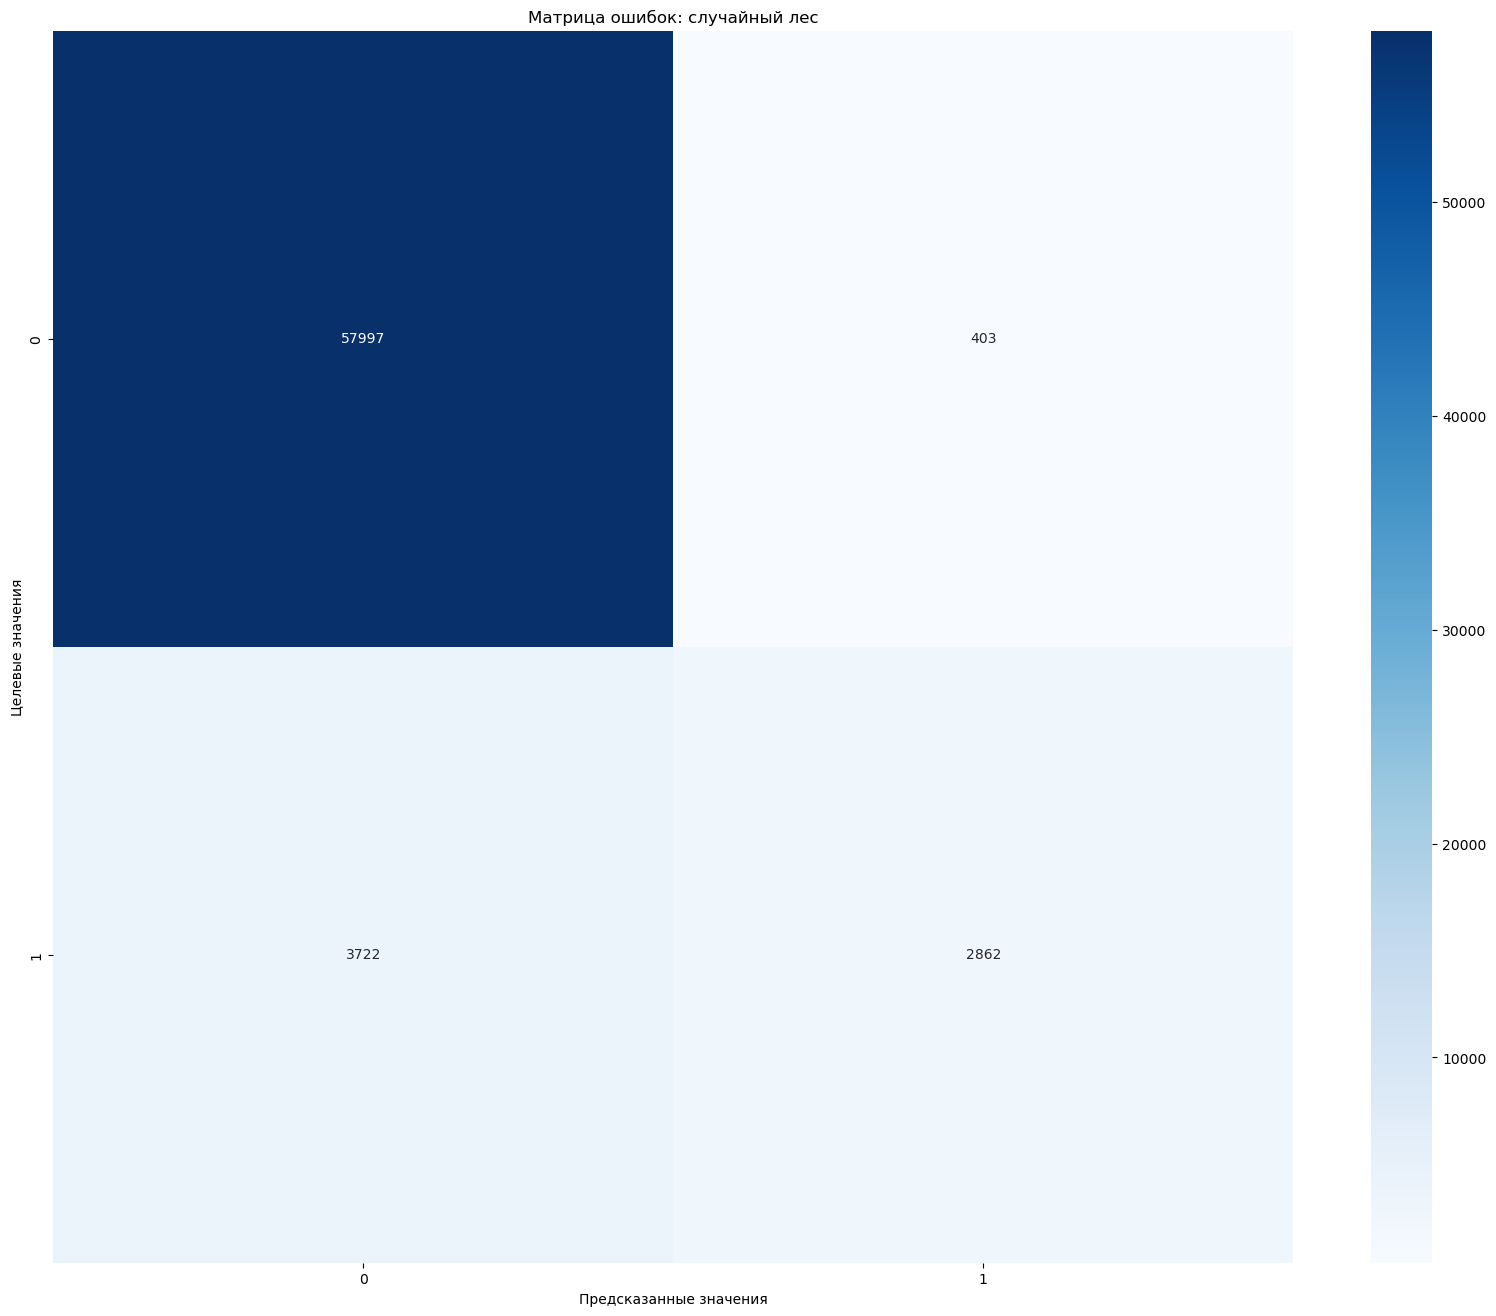

In [80]:
# Случайный лес

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')
y_pred = cross_val_predict(rfc, X, y, cv=cv)

count_metrics(y, y_pred, 'случайный лес')  # полноту можно улучшить

Accuracy: 0.9130
Precision: 0.8752
Recall: 0.1651
F1-score: 0.2778


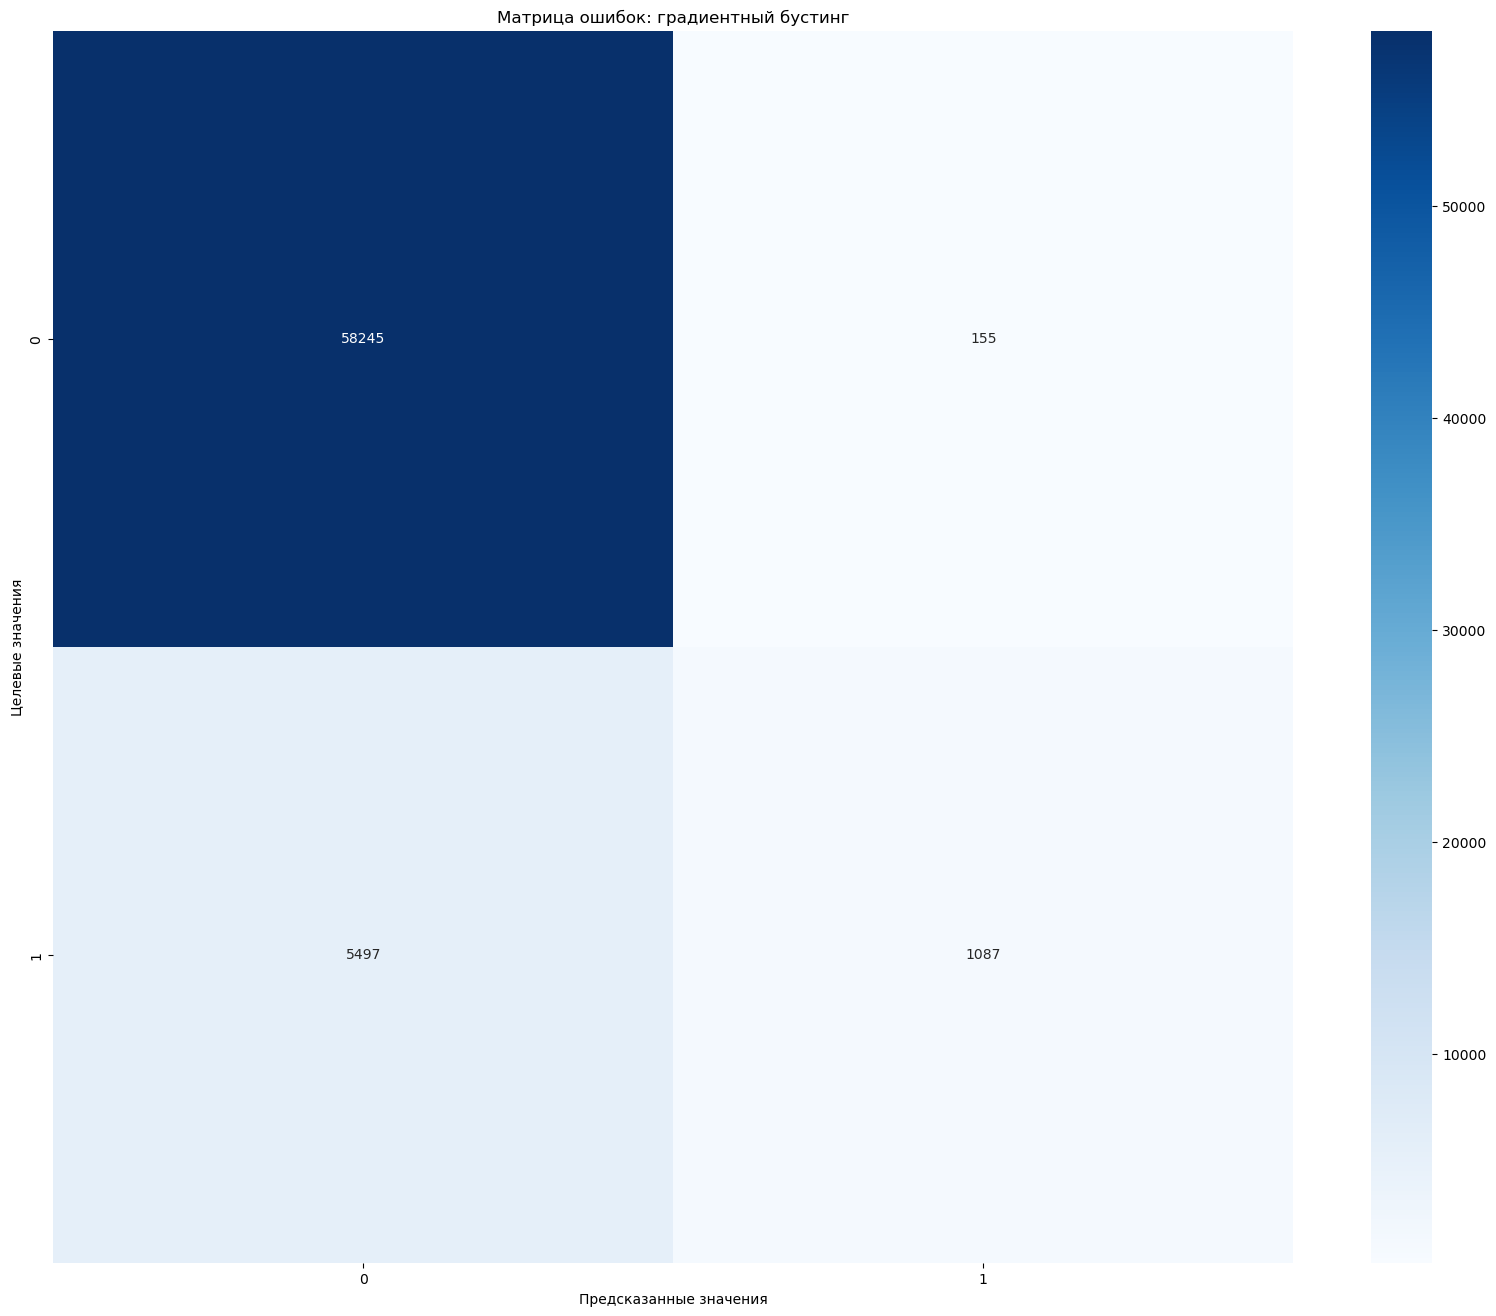

In [81]:
# Градиентный бустинг (sklearn)

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
y_pred = cross_val_predict(gb, X, y, cv=cv)

count_metrics(y, y_pred, 'градиентный бустинг')  # полнота низкая

Accuracy: 0.9510
Precision: 0.8072
Recall: 0.6779
F1-score: 0.7369


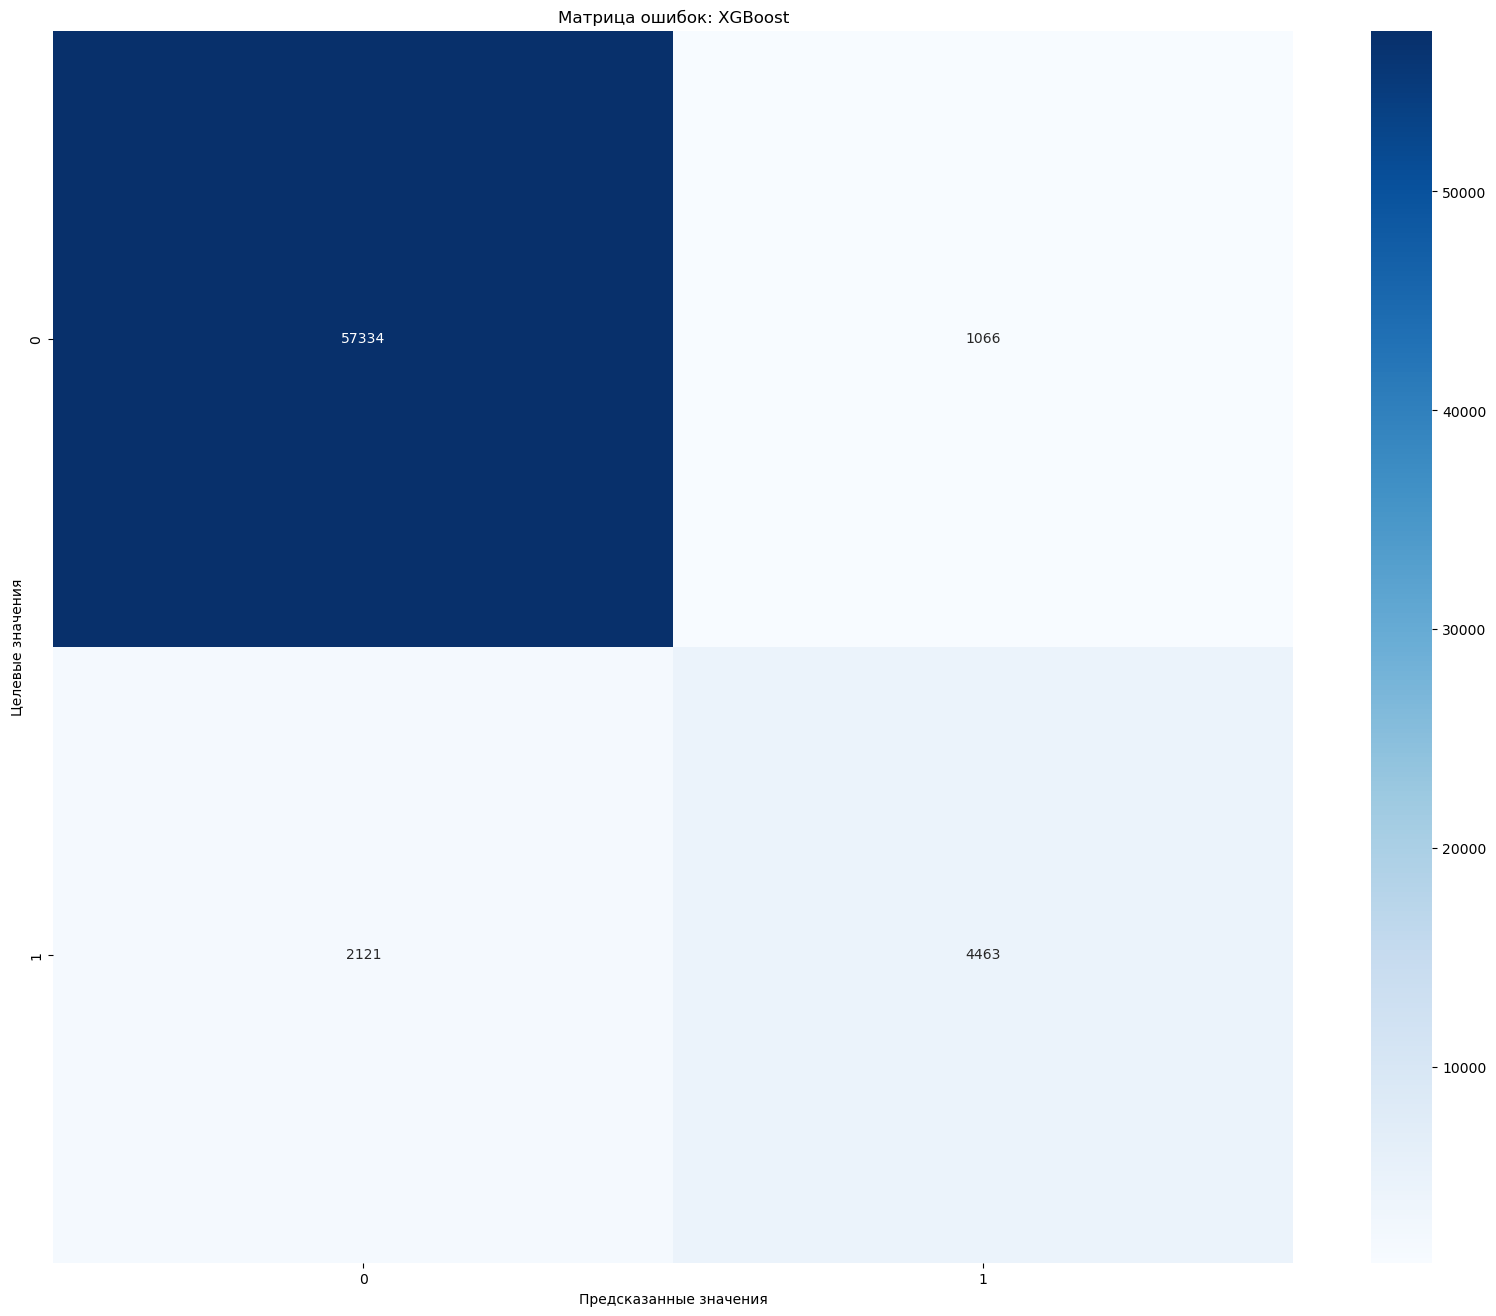

In [82]:
# Градиентный бустинг (XGBoost)

from xgboost import XGBClassifier

xgb = XGBClassifier()
y_pred = cross_val_predict(xgb, X, y, cv=cv)

count_metrics(y, y_pred, 'XGBoost')  # полноту можно улучшить

Accuracy: 0.9549
Precision: 0.8316
Recall: 0.6955
F1-score: 0.7575


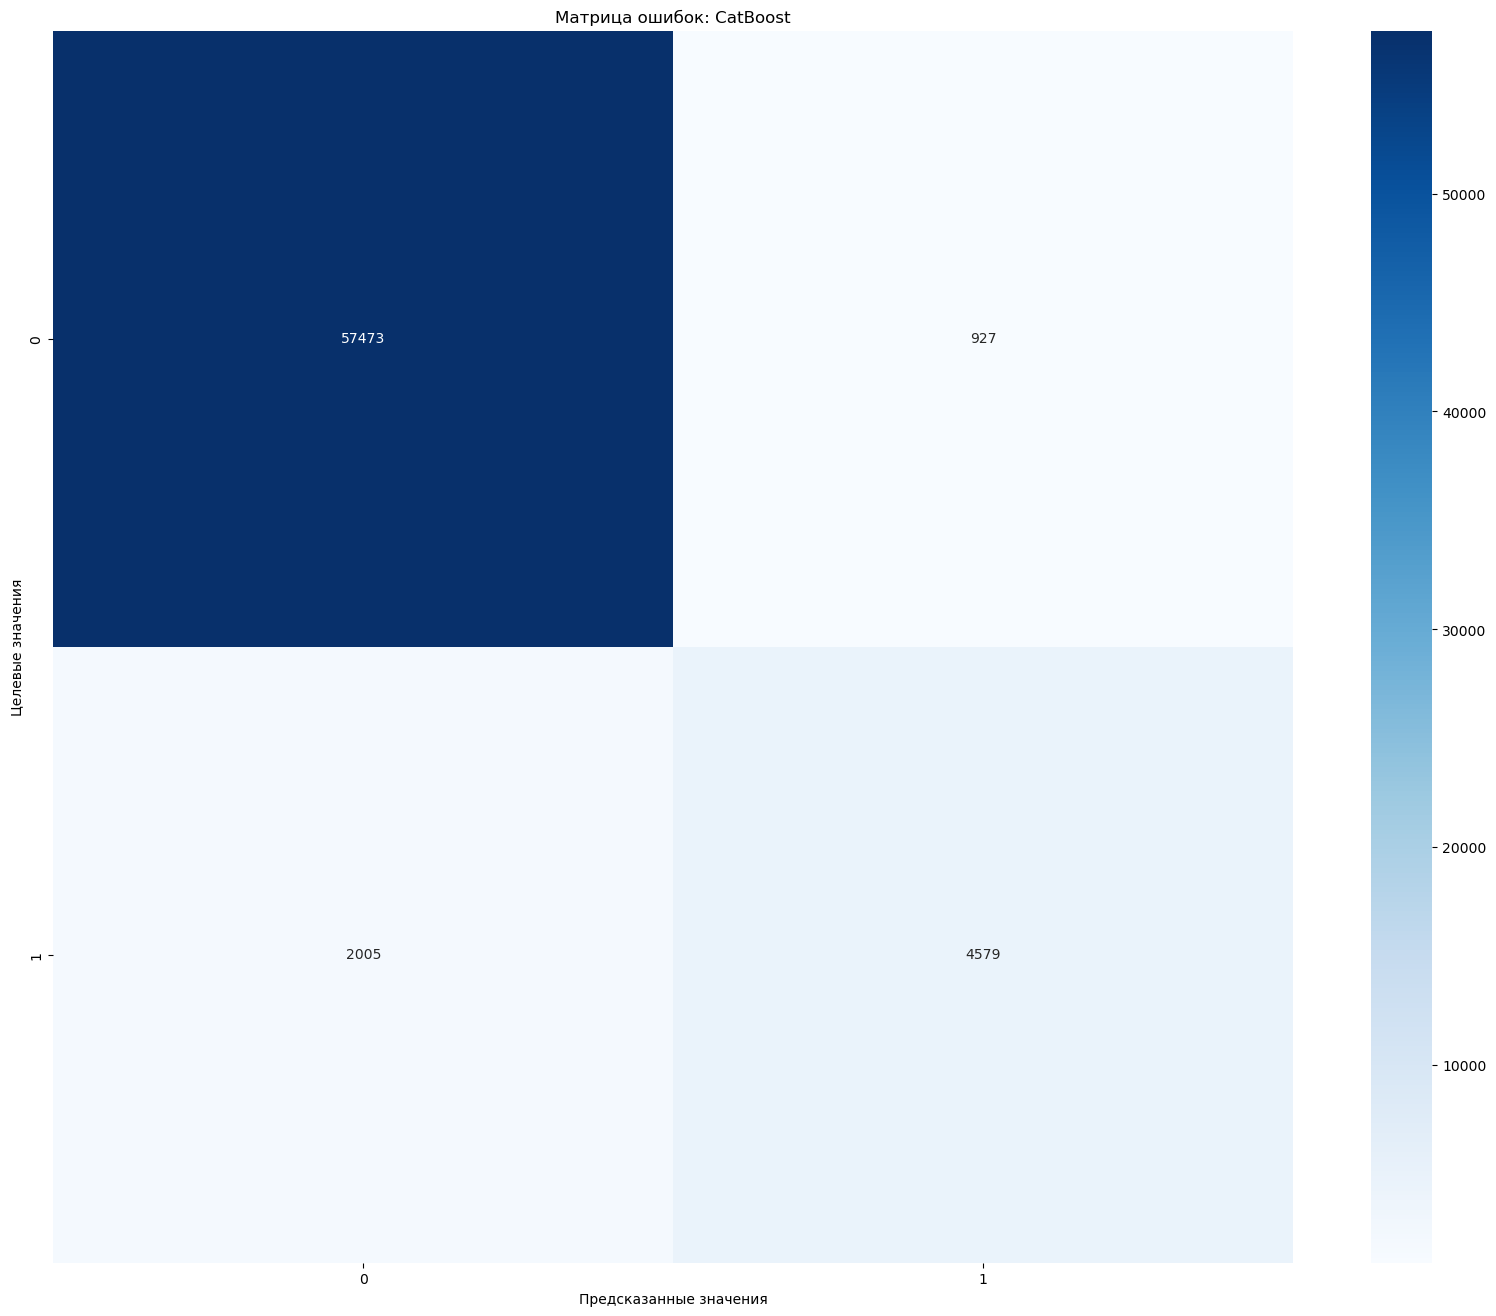

In [83]:
# Градиентный бустинг (CatBoost)

from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose=False)
y_pred = cross_val_predict(cb, X, y, cv=cv)

count_metrics(y, y_pred, 'CatBoost')  # полноту можно улучшить

Accuracy: 0.9408
Precision: 0.8382
Recall: 0.5147
F1-score: 0.6378


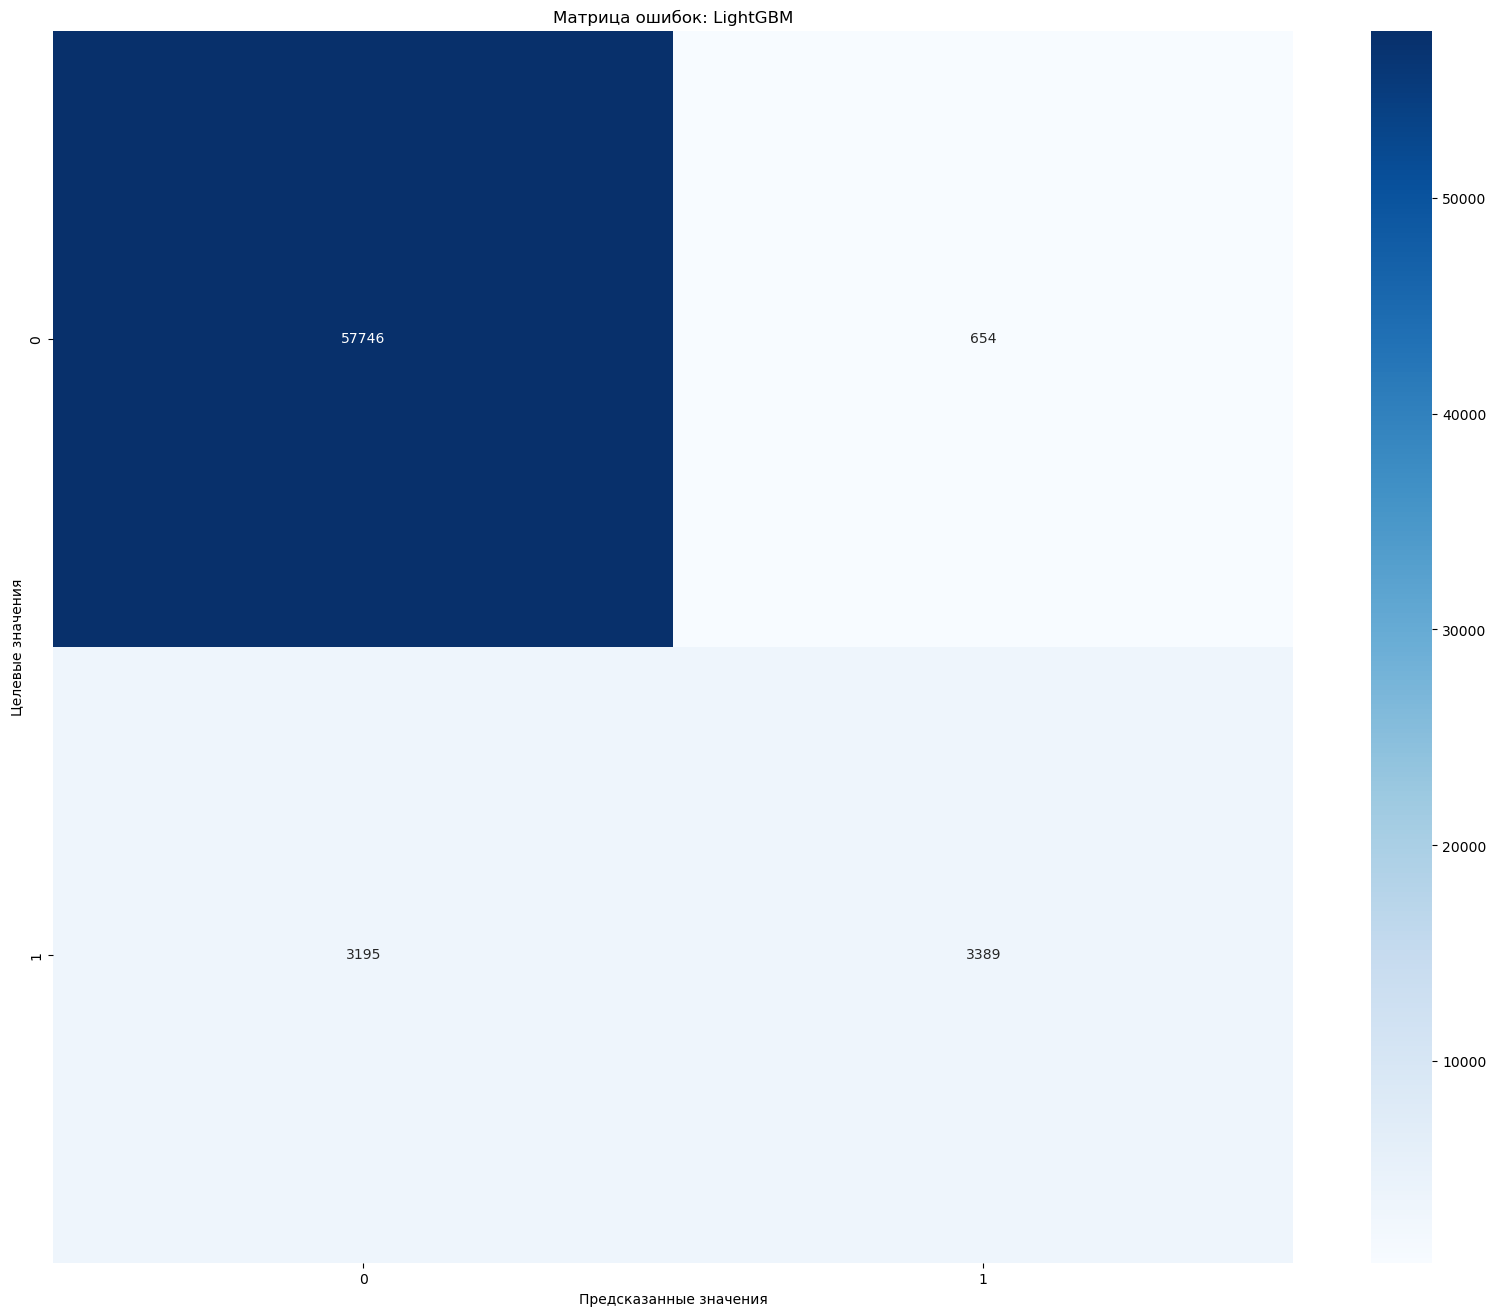

In [84]:
# Градиентный бустинг (LightGBM)

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=-1)
y_pred = cross_val_predict(lgbm, X, y, cv=cv)

count_metrics(y, y_pred, 'LightGBM')  # полноту можно улучшить

In [98]:
# Подберём лучшие гиперпараметры для XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': np.arange(400, 650, 50),
    'learning_rate': np.arange(0.25, 0.36, 0.01),
    'max_depth': np.arange(5, 8)
}

grid = GridSearchCV(XGBClassifier(), param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid.fit(X, y)

grid.best_params_

{'learning_rate': 0.30000000000000004, 'max_depth': 6, 'n_estimators': 600}

Accuracy: 0.9499
Precision: 0.7949
Recall: 0.6810
F1-score: 0.7336


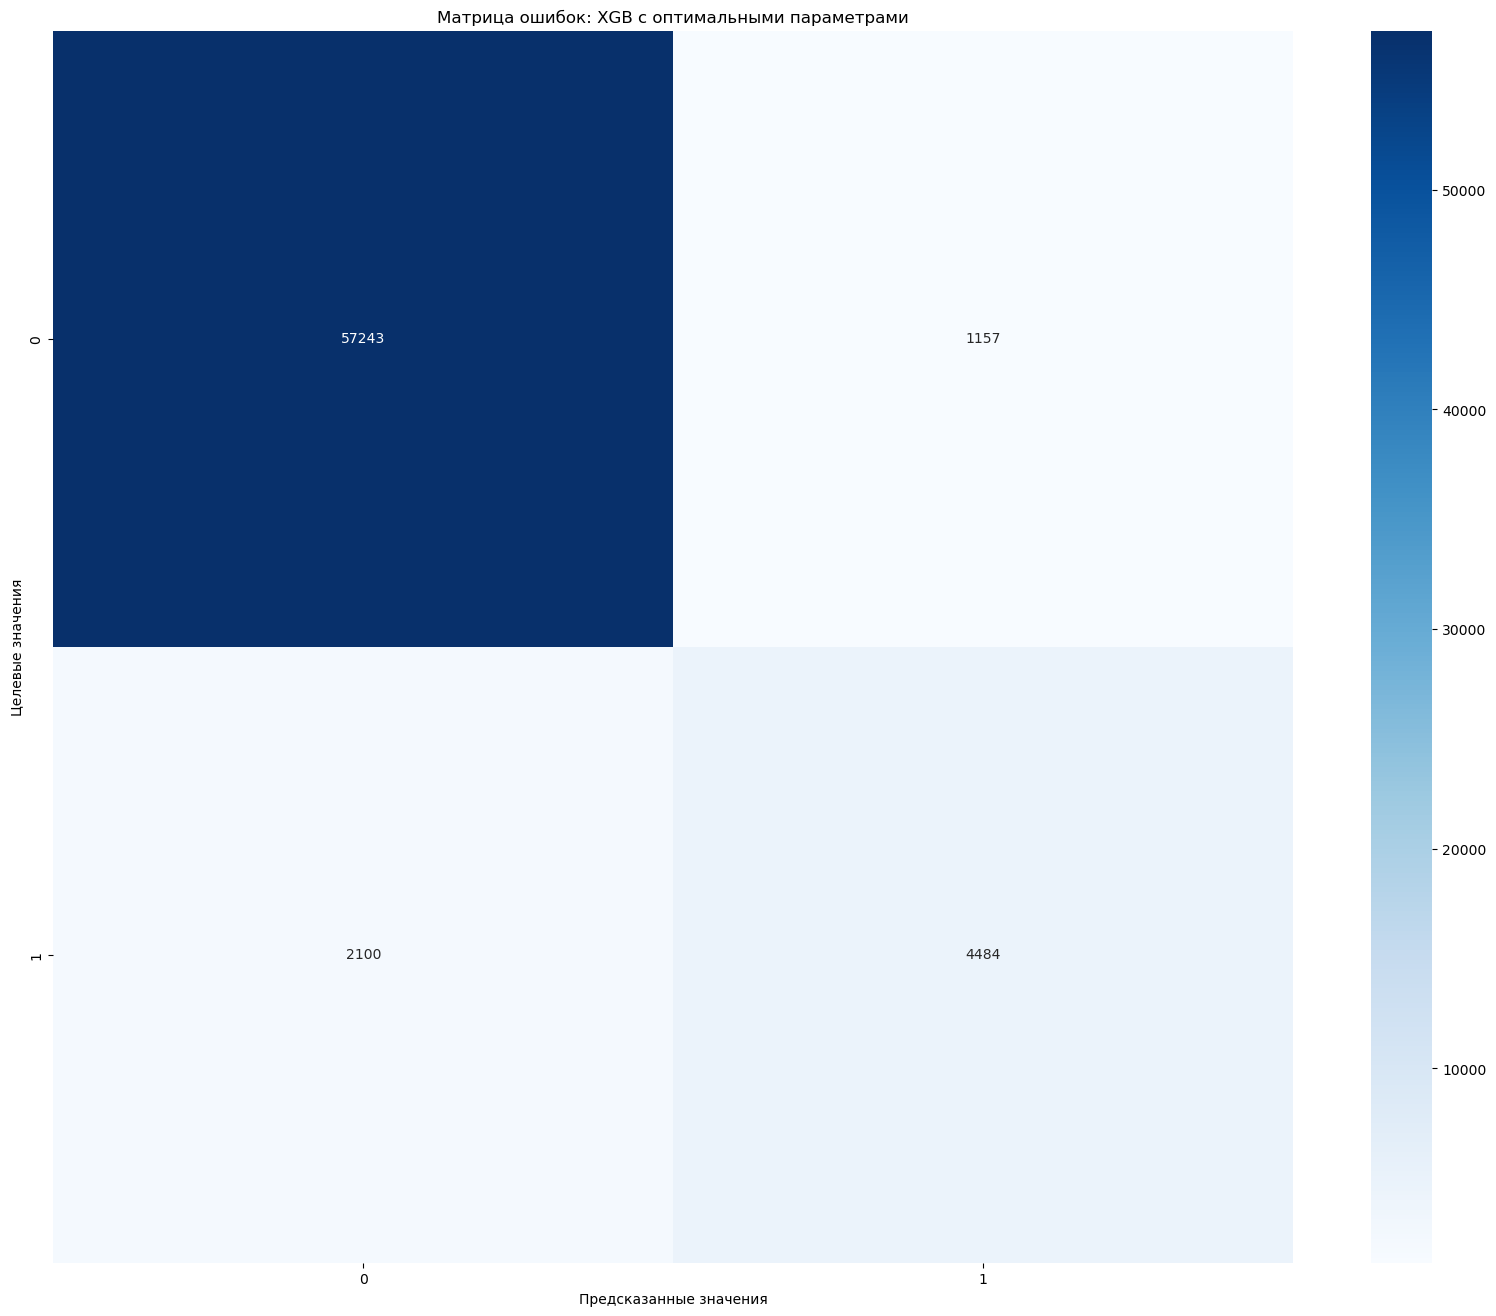

In [137]:
y_pred = cross_val_predict(XGBClassifier(learning_rate=0.3,
                                         max_depth=6,
                                         n_estimators=600),
                           X, y, cv=cv)

count_metrics(y, y_pred, 'XGB с оптимальными параметрами')  # полноту можно улучшить

In [162]:
# используем разбиение на train и test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.3,
    random_state=42
)

In [163]:
gradient_boosting_xgboost = XGBClassifier(learning_rate=0.3,
                                          n_estimators=600,
                                          max_depth=7)
gradient_boosting_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, ...)

In [164]:
from sklearn.metrics import precision_recall_curve

# Найдём идеальный порог уверенности модели, выше которого будем присваивать класс 1
y_proba = gradient_boosting_xgboost.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Попробуем найти наилучший порог для F1-меры
f1_scores = 2 * precision * recall / (precision + recall + 1e-10)
best_threshold = thresholds[f1_scores.argmax()]
y_pred = (y_proba >= best_threshold).astype(int)

print(f"Оптимальный порог: {best_threshold:.3f}")

Оптимальный порог: 0.207


Accuracy: 0.9517
Precision: 0.8263
Recall: 0.7318
F1-score: 0.7762


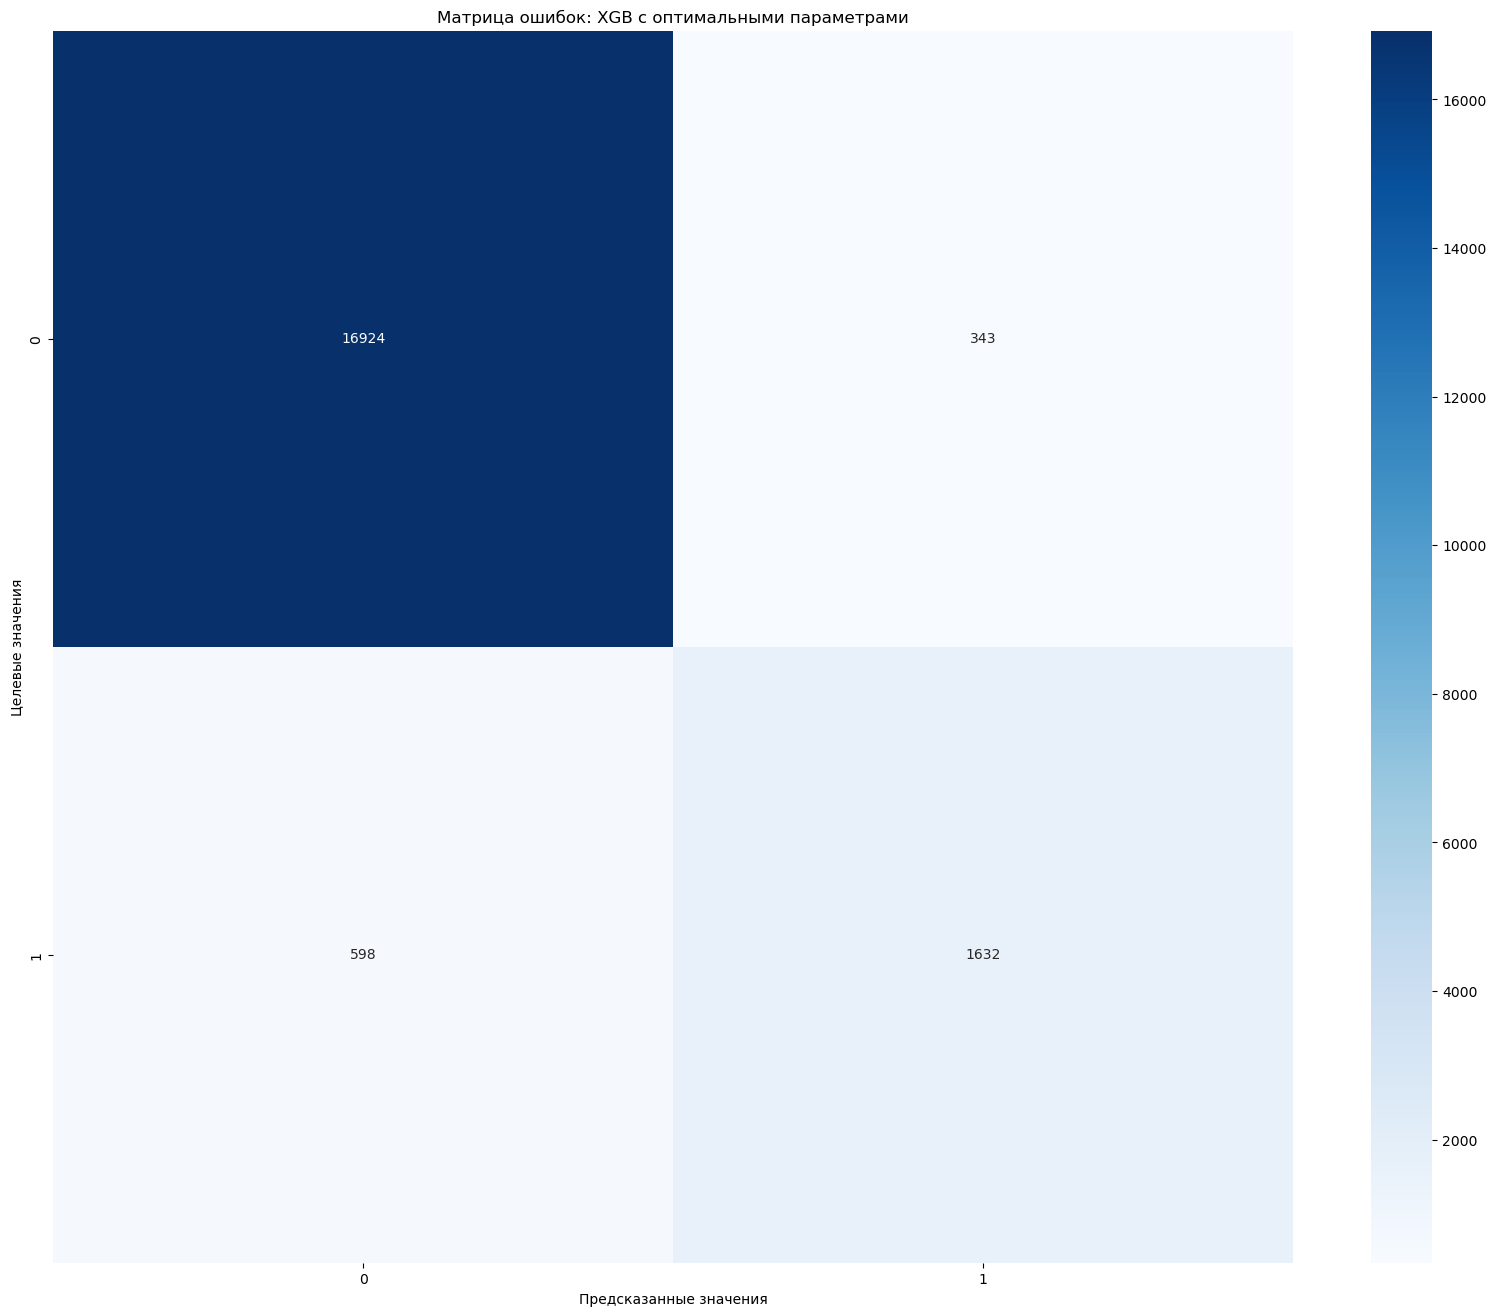

In [165]:
count_metrics(y_pred, y_test, 'XGB с оптимальными параметрами')

In [166]:
# Стекинг бустингов

from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [167]:
# Модели, которые используются в стекинге: различные реализации бустингов
base_estimators = [
    ('catboost', CatBoostClassifier(
        verbose=False, random_state=42
    )),
    ('xgb', XGBClassifier(
        eval_metric='logloss', random_state=42
    )),
    ('lgbm', LGBMClassifier(
        random_state=42, verbose=-1
    )),
]

In [168]:
# Мета-классификатор - логистическая регрессия
final_est = LogisticRegression(
    solver='lbfgs',
    random_state=42
)

In [169]:
# Стекинг
stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_est,
    cv=20,
    n_jobs=-1,
    passthrough=False
)

stack.fit(X_train, y_train)

StackingClassifier(cv=20,
                   estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x0000022B9EBA3750>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              fe...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('lgbm',
                                LGBMClassifier(random_state=42, verbose=-1))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

In [170]:
# Найдём идеальный порог уверенности модели, выше которого будем присваивать класс 1
y_proba = stack.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Попробуем найти наилучший порог для F1-меры
f1_scores = 2 * precision * recall / (precision + recall + 1e-10)
best_threshold = thresholds[f1_scores.argmax()]
y_pred = (y_proba >= best_threshold).astype(int)

print(f"Оптимальный порог: {best_threshold:.3f}")

Оптимальный порог: 0.233


Accuracy: 0.9525
Precision: 0.8228
Recall: 0.7383
F1-score: 0.7783


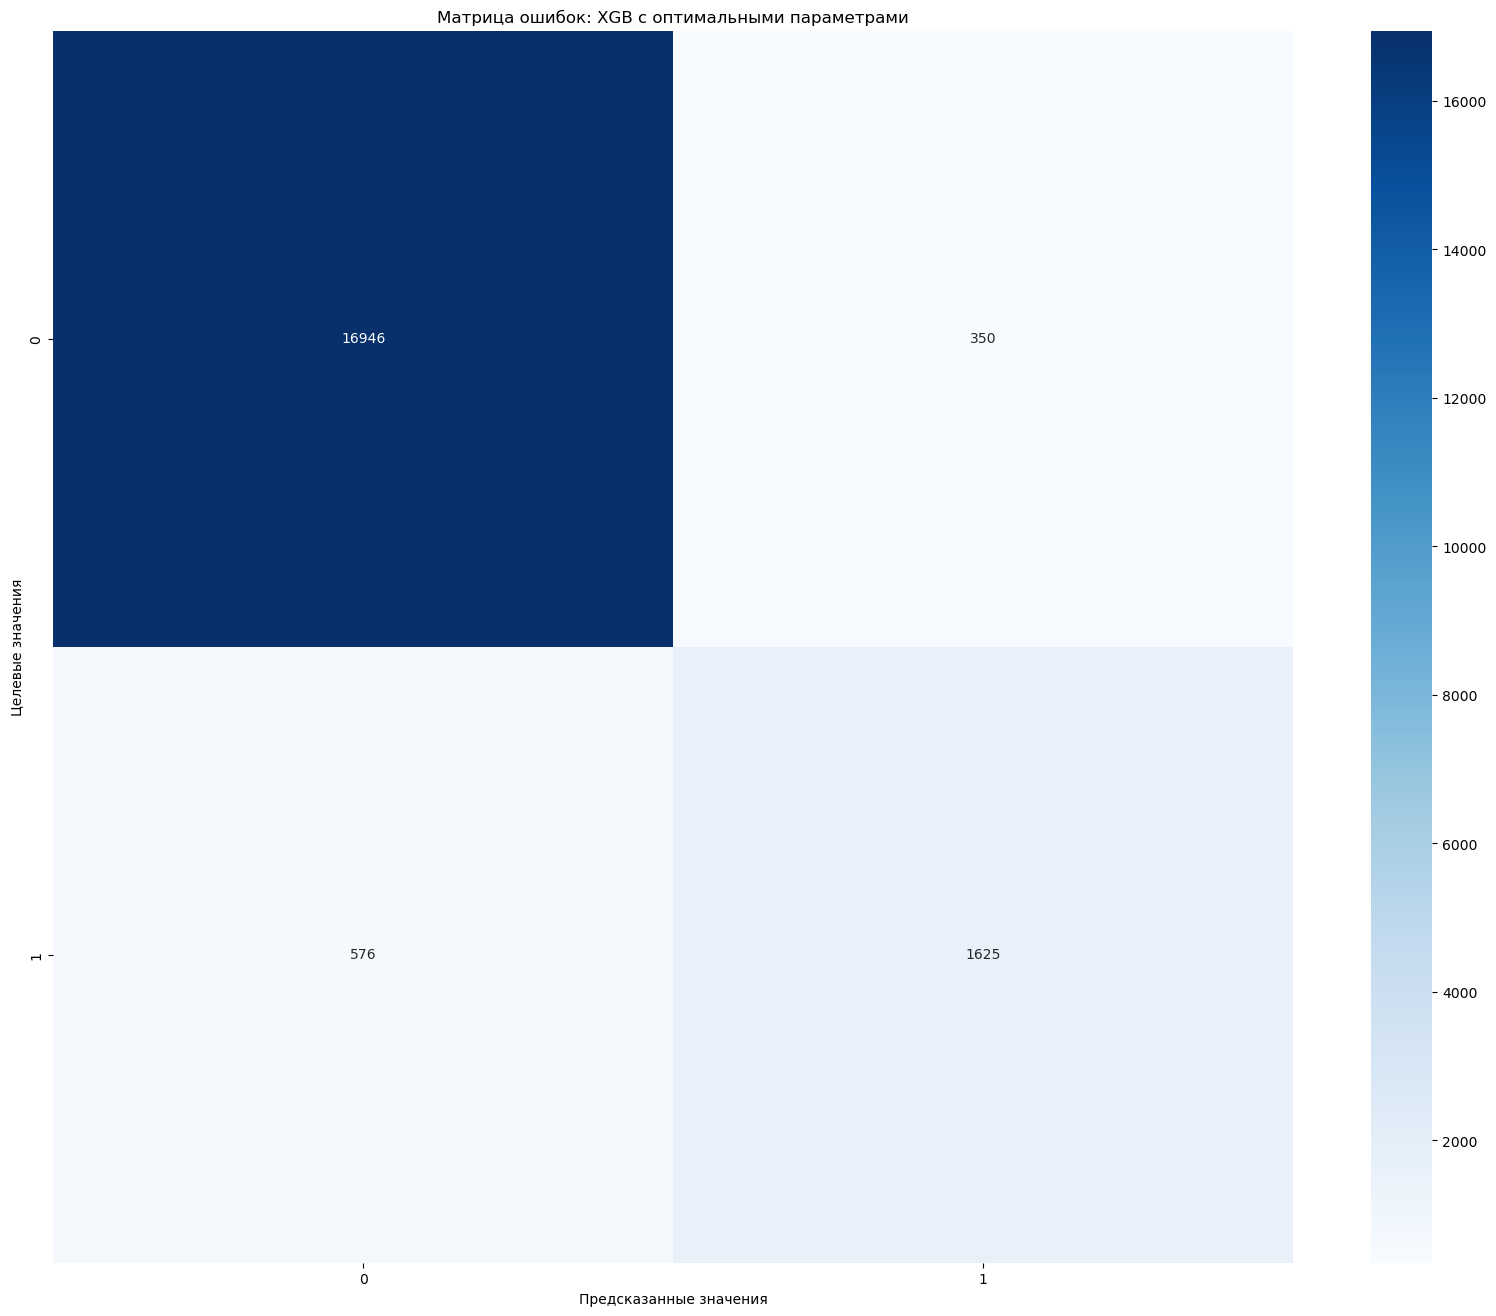

In [171]:
count_metrics(y_pred, y_test, 'XGB с оптимальными параметрами')